# Understanding Data

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import functools as ft

#Importing data as dataframe
df = pd.read_csv("SUSS+.csv")
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  review_score  
0  As her father nears the end of his life, filmm...           8.0  
1  After crossing paths at a party, a Cape Town t...          10.0  
2  To protect his family from a powerful drug lor...           6.0  
3  Feuds, flirtations and toilet talk go down amo...           9.0  
4  In a city of coaching centers known to train I...           7.0

In [2]:
#Finding out the type of data inside the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8807 non-null   object 
 1   type          8807 non-null   object 
 2   title         8807 non-null   object 
 3   director      6173 non-null   object 
 4   cast          7982 non-null   object 
 5   country       7976 non-null   object 
 6   date_added    8797 non-null   object 
 7   release_year  8807 non-null   int64  
 8   rating        8803 non-null   object 
 9   duration      8804 non-null   object 
 10  listed_in     8807 non-null   object 
 11  description   8807 non-null   object 
 12  review_score  8789 non-null   float64
dtypes: float64(1), int64(1), object(11)
memory usage: 894.6+ KB


In [3]:
#Finding out the number of NAs
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
review_score      18
dtype: int64

In [4]:
#Exploring Data
df.describe()

release_year  review_score
count   8807.000000   8789.000000
mean    2014.180198      6.131869
std        8.819312      2.733792
min     1925.000000      1.000000
25%     2013.000000      4.000000
50%     2017.000000      6.000000
75%     2019.000000      8.000000
max     2021.000000     10.000000

# Cleaning Data

In [7]:
#Drop any duplicates
df2 = df.drop_duplicates()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8807 non-null   object 
 1   type          8807 non-null   object 
 2   title         8807 non-null   object 
 3   director      6173 non-null   object 
 4   cast          7982 non-null   object 
 5   country       7976 non-null   object 
 6   date_added    8797 non-null   object 
 7   release_year  8807 non-null   int64  
 8   rating        8803 non-null   object 
 9   duration      8804 non-null   object 
 10  listed_in     8807 non-null   object 
 11  description   8807 non-null   object 
 12  review_score  8789 non-null   float64
dtypes: float64(1), int64(1), object(11)
memory usage: 963.3+ KB


In [8]:
#Dropping columns which are not useful (director, cast, description, duration)
df2 = df.drop(['director', 'cast','description','duration'], axis=1)

In [9]:
#Replacing some data in rating as UR
df2[df2['rating'].isnull()]
df2['rating'] = df2['rating'].replace(np.nan, "UR")

In [10]:
#Drop rows which have NAs in date_added
df2 = df2.dropna(subset=['date_added'])

In [11]:
#Finding the number of unique values
df2.nunique()

show_id         8797
type               2
title           8794
country          748
date_added      1767
release_year      74
rating            17
listed_in        513
review_score      10
dtype: int64

In [12]:
#Find any duplicated title
dups = df2[df2['title'].duplicated()]
dups = dups['show_id']

#Dropping duplicated title based on show_id
dups = df2.loc[df2['show_id'].isin(dups)]
df2 = df2.drop(df2.index[[5964,5965,5966]])

In [13]:
#Cleaning strings with whitespaces/improper data for country
df2['country'] = df2['country'].str.lstrip(',')
df2['country'] = df2['country'].str.strip()
df2.loc[df2['show_id'] == 's1193', 'country'] = "United Kingdom"
df2.loc[df2['show_id'] == 's2225', 'country'] = "France, Belgium, Luxembourg, Cambodia"
df2.loc[df2['show_id'] == 's4654', 'country'] = "United States"
df2.loc[df2['show_id'] == 's5926', 'country'] = "United Kingdom"
df2.loc[df2['show_id'] == 's7008', 'country'] = "Poland"

In [14]:
#Cleaning Up Some inaccurate release_year
df2.loc[df2['show_id'] == 's7113', 'release_year'] = 2010
df2.loc[df2['show_id'] == 's5659', 'release_year'] = 2015
df2.loc[df2['show_id'] == 's1552', 'release_year'] = 2018
df2.loc[df2['show_id'] == 's1697', 'release_year'] = 2018
df2.loc[df2['show_id'] == 's2921', 'release_year'] = 2020
df2.loc[df2['show_id'] == 's3169', 'release_year'] = 2016
df2.loc[df2['show_id'] == 's3288', 'release_year'] = 2019
df2.loc[df2['show_id'] == 's3370', 'release_year'] = 2014
df2.loc[df2['show_id'] == 's3434', 'release_year'] = 2018
df2.loc[df2['show_id'] == 's4845', 'release_year'] = 2015
df2.loc[df2['show_id'] == 's4846', 'release_year'] = 2003
df2.loc[df2['show_id'] == 's5395', 'release_year'] = 2016
df2.loc[df2['show_id'] == 's5678', 'release_year'] = 2016
df2.loc[df2['show_id'] == 's7064', 'release_year'] = 2018

In [15]:
#Cleaning strings with improper data for rating/duration
df2.loc[df2['show_id'] == 's5542', 'duration'] = df2.loc[df2['show_id'] == 's5542', 'rating']
df2.loc[df2['show_id'] == 's5795', 'duration'] = df2.loc[df2['show_id'] == 's5795', 'rating']
df2.loc[df2['show_id'] == 's5814', 'duration'] = df2.loc[df2['show_id'] == 's5814', 'rating']

df2.loc[df2['show_id'] == 's5542', 'rating'] = "UR"
df2.loc[df2['show_id'] == 's5795', 'rating'] = "UR"
df2.loc[df2['show_id'] == 's5814', 'rating'] = "UR"

### Replace NA in review_score with Median

In [16]:
#Replacing review score with overall median of review score
df2['review_score'] = df2['review_score'].fillna(df2['review_score'].median())
df2.isnull().sum()

show_id            0
type               0
title              0
country          829
date_added         0
release_year       0
rating             0
listed_in          0
review_score       0
duration        8791
dtype: int64

In [15]:
#Replacing NAs in Country to "Undefined"
df2['country'] = df2['country'].replace(np.nan, "Undefined")

In [16]:
df2.nunique()

show_id         8794
type               2
title           8794
country          744
date_added      1767
release_year      74
rating            14
listed_in        513
review_score      10
duration           3
dtype: int64

In [17]:
df2.isnull().sum()

show_id            0
type               0
title              0
country            0
date_added         0
release_year       0
rating             0
listed_in          0
review_score       0
duration        8791
dtype: int64

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8794 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8794 non-null   object 
 1   type          8794 non-null   object 
 2   title         8794 non-null   object 
 3   country       8794 non-null   object 
 4   date_added    8794 non-null   object 
 5   release_year  8794 non-null   int64  
 6   rating        8794 non-null   object 
 7   listed_in     8794 non-null   object 
 8   review_score  8794 non-null   float64
 9   duration      3 non-null      object 
dtypes: float64(1), int64(1), object(8)
memory usage: 755.7+ KB


In [19]:
df2 = df2.reset_index()

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8794 entries, 0 to 8793
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         8794 non-null   int64  
 1   show_id       8794 non-null   object 
 2   type          8794 non-null   object 
 3   title         8794 non-null   object 
 4   country       8794 non-null   object 
 5   date_added    8794 non-null   object 
 6   release_year  8794 non-null   int64  
 7   rating        8794 non-null   object 
 8   listed_in     8794 non-null   object 
 9   review_score  8794 non-null   float64
 10  duration      3 non-null      object 
dtypes: float64(1), int64(2), object(8)
memory usage: 755.9+ KB


In [21]:
#-- data cleanup break --

### Graph 1 - Trend of New Releases (2008-2001)

In [22]:
print (df2)

      index show_id     type                  title        country  \
0         0      s1    Movie   Dick Johnson Is Dead  United States   
1         1      s2  TV Show          Blood & Water   South Africa   
2         2      s3  TV Show              Ganglands      Undefined   
3         3      s4  TV Show  Jailbirds New Orleans      Undefined   
4         4      s5  TV Show           Kota Factory          India   
...     ...     ...      ...                    ...            ...   
8789   8802   s8803    Movie                 Zodiac  United States   
8790   8803   s8804  TV Show            Zombie Dumb      Undefined   
8791   8804   s8805    Movie             Zombieland  United States   
8792   8805   s8806    Movie                   Zoom  United States   
8793   8806   s8807    Movie                 Zubaan          India   

              date_added  release_year rating  \
0     September 25, 2021          2020  PG-13   
1     September 24, 2021          2021  TV-MA   
2     Septem

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
df2['year_counted'] = df2['date_added'].str[-4:]
year_count = df2.groupby('year_counted').year_counted.count()
year_count = pd.DataFrame(year_count)
year_count.index.name = 'Year'
year_count.columns = ['Count']
year_count = year_count.reset_index()
year_count

Year  Count
0   2008      2
1   2009      2
2   2010      1
3   2011     13
4   2012      3
5   2013     11
6   2014     24
7   2015     82
8   2016    429
9   2017   1188
10  2018   1648
11  2019   2014
12  2020   1879
13  2021   1498

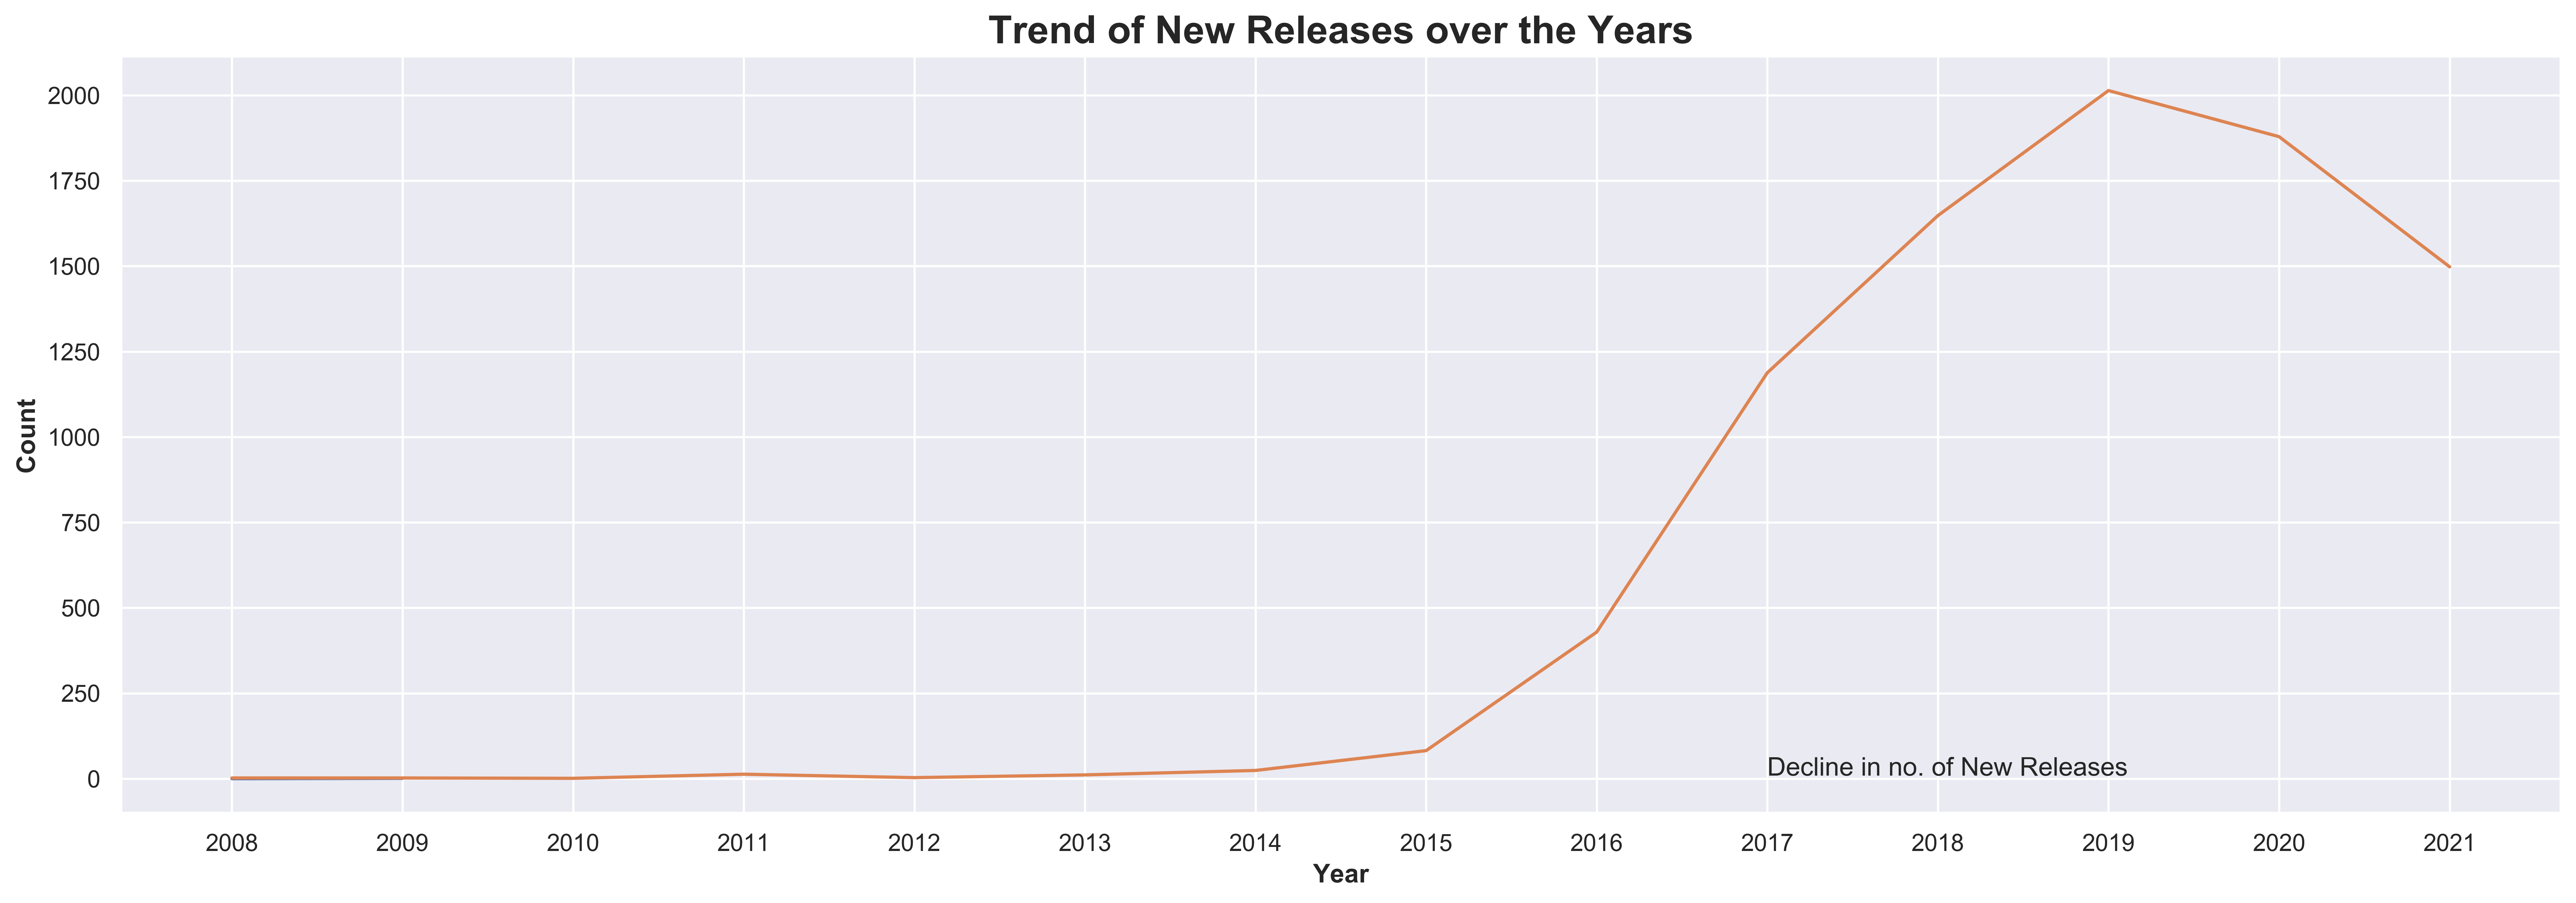

In [87]:
x_axis = year_count['Year']
y_axis = year_count['Count']

fig, ax = plt.subplots()
ax.plot([0, 1],[0, 1])
ax.annotate("Decline in no. of New Releases", xy=(0.1, 0.1), xytext=(9.0, 9.0))
            
plt.plot(x_axis, y_axis)
plt.title('Trend of New Releases over the Years', fontsize = 18, fontweight = 'bold')
plt.xlabel('Year', fontsize = 12, fontweight = 'bold')
plt.ylabel('Count', fontsize = 12, fontweight = 'bold')

plt.rcParams["figure.figsize"] = (18,6)

plt.show()


### Graph 2 - Difference between Show Release Year and when Added to SUSS+

In [25]:
#Creating data for graph 2
df4 = df2
year_added = df4['date_added'].str[-4:]
df4.insert(6, "year_added", year_added, True)
df4['year_added'] = df4['year_added'].astype('int')

In [26]:
#Replacing movies/tv shows produced in years before 2008 
#so that the difference in the years seems fair
df4.loc[df4['release_year'] <2008, 'release_year'] = 2008

df4['diff_years'] = df4['year_added']-df4['release_year']

In [27]:
diff_years = df4.groupby('diff_years').diff_years.count()
diff_years = pd.DataFrame(diff_years)
diff_years.index.name = 'Difference in Years'
diff_years.columns = ['Count']
diff_years = diff_years.reset_index()

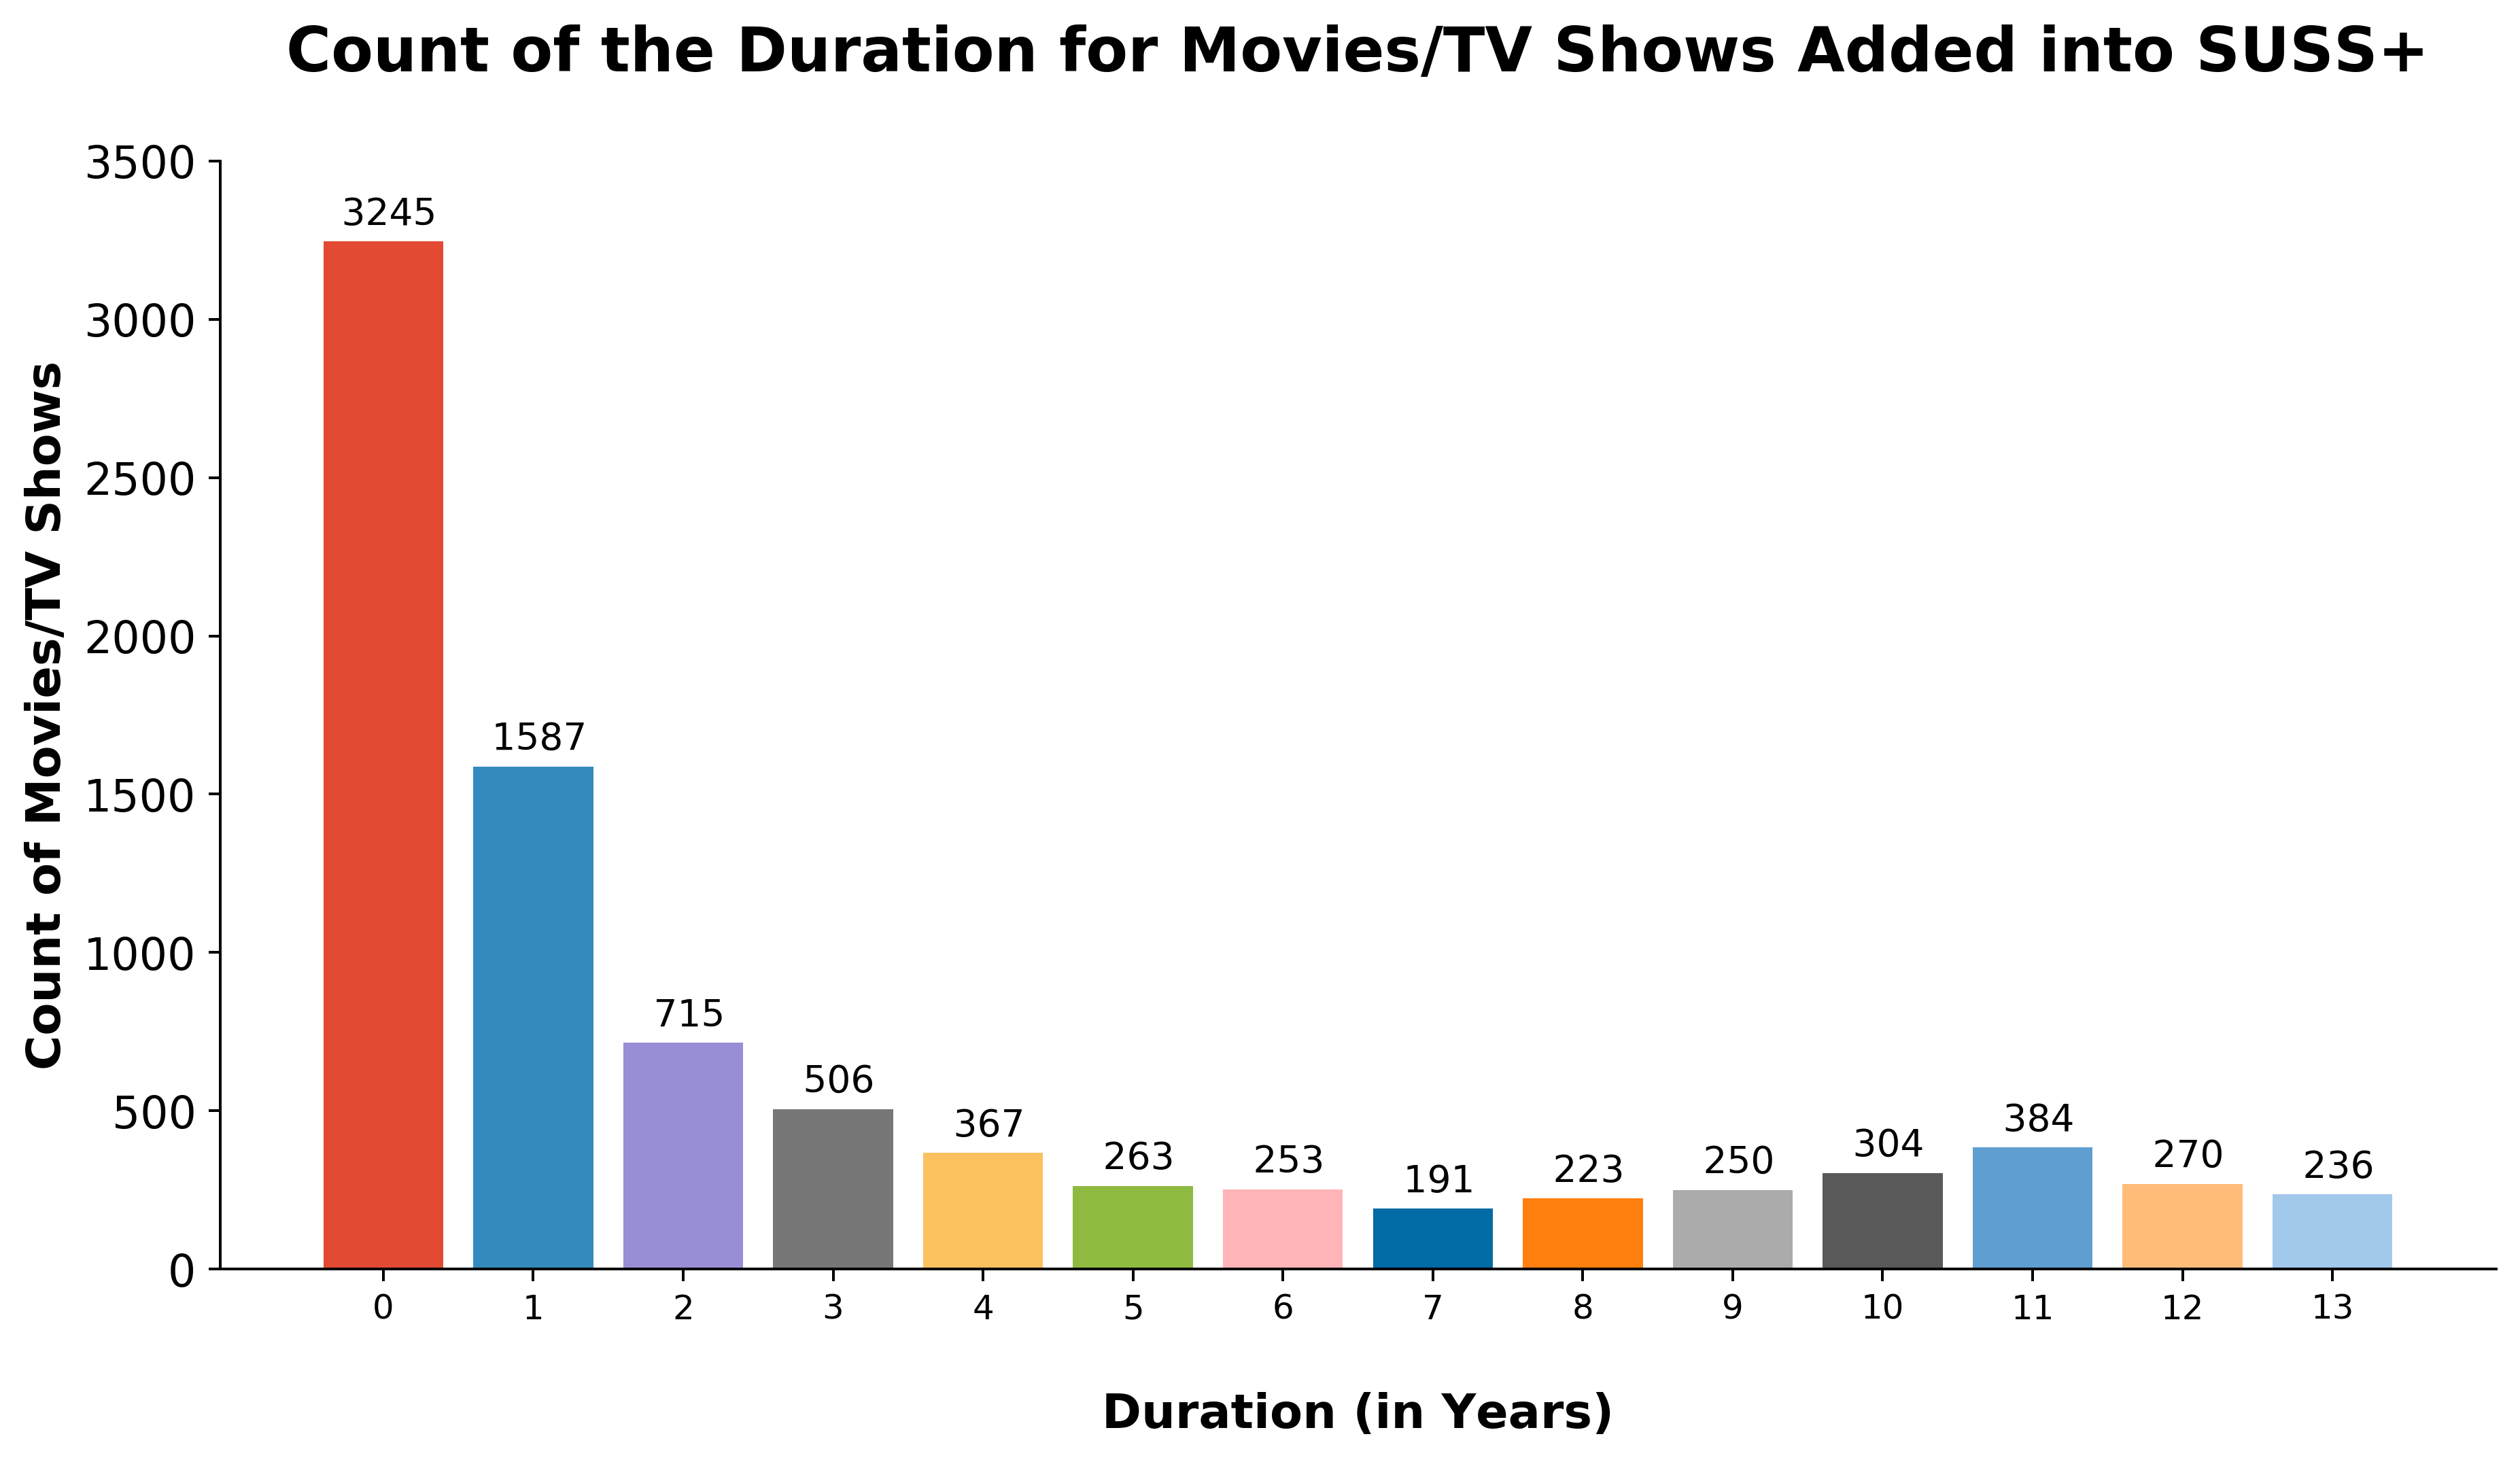

In [28]:
fig = plt.figure(figsize=(12,6), dpi=360, facecolor='white')
ax1 = plt.subplot()
bar_colors = ['#E24A33','#348ABD','#988ED5', '#777777','#FBC15E','#8EBA42', 
              '#FFB5B8','#006BA4', '#FF800E','#ABABAB', '#595959', '#5F9ED1','#FFBC79','#A2C8EC']
venise_bar = ax1.bar(diff_years['Difference in Years'], diff_years['Count'], color = bar_colors)

#Labeling the count of the difference in years
for bar in ax1.patches:
  ax1.annotate(format(bar.get_height(), ' '),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')

#Adjusting the bar size and titles in the graph
y_ticks = np.arange(0,4000,500)
plt.yticks(y_ticks, fontsize=13)
plt.xticks(diff_years['Difference in Years'])
plt.title('Count of the Duration for Movies/TV Shows Added into SUSS+\n', fontsize = 18, fontweight = 'bold')
plt.xlabel('\nDuration (in Years)', fontsize = 14, fontweight = 'bold')
plt.ylabel('Count of Movies/TV Shows', fontsize = 14, fontweight = 'bold')
sns.despine()

#plt.savefig('graph2_venise.png')

### Graph 3 - Count of Review Scores for Movies

In [29]:
import matplotlib.pyplot as plt

df_movies = df2[df2["type"] == "Movie"]
df_movies

index show_id   type                             title  \
0         0      s1  Movie              Dick Johnson Is Dead   
6         6      s7  Movie  My Little Pony: A New Generation   
7         7      s8  Movie                           Sankofa   
9         9     s10  Movie                      The Starling   
12       12     s13  Movie                      Je Suis Karl   
...     ...     ...    ...                               ...   
8788   8801   s8802  Movie                           Zinzana   
8789   8802   s8803  Movie                            Zodiac   
8791   8804   s8805  Movie                        Zombieland   
8792   8805   s8806  Movie                              Zoom   
8793   8806   s8807  Movie                            Zubaan   

                                                country          date_added  \
0                                         United States  September 25, 2021   
6                                             Undefined  September 24, 2021   
7     United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
9                                         United States  September 24, 2021   
12                              Germany, Czech Republic  September 23, 2021   
...                                                 ...                 ...   
8788                       United Arab Emirates, Jordan       March 9, 2016   
8789                                      United States   November 20, 2019   
8791                                      United States    November 1, 2019   
8792                                      United States    January 11, 2020   
8793                                              India       March 2, 2019   

      year_added  release_year rating  \
0           2021          2020  PG-13   
6           2021          2021     PG   
7           2021          2008  TV-MA   
9           2021          2021  PG-13   
12          2021          2021  TV-MA   
...          ...           ...    ...   
8788        2016          2015  TV-MA   
8789        2019          2008      R   
8791        2019          2009      R   
8792        2020          2008     PG   
8793        2019          2015  TV-14   

                                             listed_in  review_score duration  \
0                                        Documentaries           8.0      NaN   
6                             Children & Family Movies           6.0      NaN   
7     Dramas, Independent Movies, International Movies           8.0      NaN   
9                                     Comedies, Dramas           5.0      NaN   
12                        Dramas, International Movies           9.0      NaN   
...                                                ...           ...      ...   
8788           Dramas, International Movies, Thrillers           6.0      NaN   
8789                    Cult Movies, Dramas, Thrillers           7.0      NaN   
8791                           Comedies, Horror Movies           1.0      NaN   
8792                Children & Family Movies, Comedies           8.0      NaN   
8793    Dramas, International Movies, Music & Musicals           9.0      NaN   

     year_counted  diff_years  
0            2021           1  
6            2021           0  
7            2021          13  
9            2021           0  
12           2021           0  
...           ...         ...  
8788         2016           1  
8789         2019          11  
8791         2019          10  
8792         2020          12  
8793         2019           4  

[6129 rows x 14 columns]

In [30]:
df_movies["review_score"].value_counts()

5.0     803
8.0     777
6.0     770
7.0     747
9.0     737
10.0    728
1.0     413
4.0     405
3.0     376
2.0     373
Name: review_score, dtype: int64

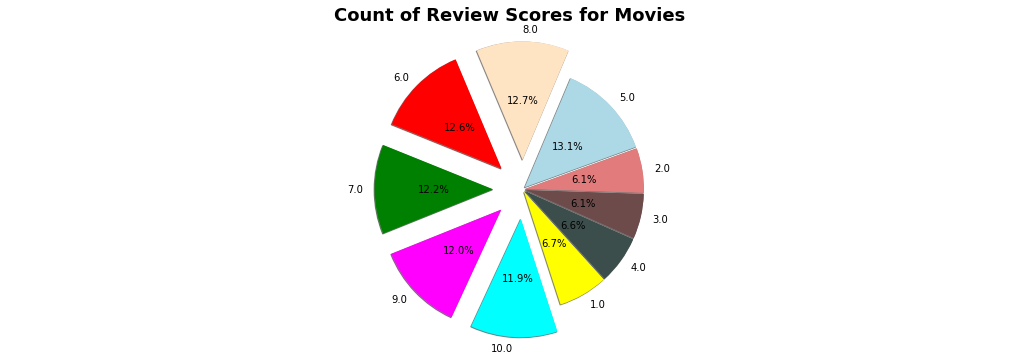

In [31]:
#Plot Pie Chart of the distribution of review score for TV Shows
pie_data = df_movies["review_score"].value_counts()
pie_labels = pie_data.keys()
pie_colors = ["lightblue", "bisque", "red", "green", "magenta", "cyan", 
              "yellow", "#3c4e4b", "#6d4b4b", "#e27c7c"]
pie_explode = (0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 0.1,
                0.1, 0.1, 0.1)

plt.pie(pie_data, labels = pie_labels, colors = pie_colors, labeldistance = 1.1, autopct="%1.1f%%",
        pctdistance = 0.5, explode = pie_explode, shadow= True, startangle = 20, radius = 4)

#Set title
plt.title("Count of Review Scores for Movies", fontsize=18, fontweight = 'bold', y=1)

#Equal aspect ratio ensures that pie chart is drawn as a circle
plt.axis("equal")

#Show graph
plt.show;

### Graph 4 - Count of Review Scores for TV Shows

In [32]:
import matplotlib.pyplot as plt

In [33]:
#Find distribution of review scores for TV Shows

df_tvshows = df2[df2["type"] == "TV Show"]
df_tvshows

index show_id     type                  title  \
1         1      s2  TV Show          Blood & Water   
2         2      s3  TV Show              Ganglands   
3         3      s4  TV Show  Jailbirds New Orleans   
4         4      s5  TV Show           Kota Factory   
5         5      s6  TV Show          Midnight Mass   
...     ...     ...      ...                    ...   
8782   8795   s8796  TV Show        Yu-Gi-Oh! Arc-V   
8783   8796   s8797  TV Show             Yunus Emre   
8784   8797   s8798  TV Show              Zak Storm   
8787   8800   s8801  TV Show     Zindagi Gulzar Hai   
8790   8803   s8804  TV Show            Zombie Dumb   

                                            country          date_added  \
1                                      South Africa  September 24, 2021   
2                                         Undefined  September 24, 2021   
3                                         Undefined  September 24, 2021   
4                                             India  September 24, 2021   
5                                         Undefined  September 24, 2021   
...                                             ...                 ...   
8782                                  Japan, Canada         May 1, 2018   
8783                                         Turkey    January 17, 2017   
8784  United States, France, South Korea, Indonesia  September 13, 2018   
8787                                       Pakistan   December 15, 2016   
8790                                      Undefined        July 1, 2019   

      year_added  release_year rating  \
1           2021          2021  TV-MA   
2           2021          2021  TV-MA   
3           2021          2021  TV-MA   
4           2021          2021  TV-MA   
5           2021          2021  TV-MA   
...          ...           ...    ...   
8782        2018          2015  TV-Y7   
8783        2017          2016  TV-PG   
8784        2018          2016  TV-Y7   
8787        2016          2012  TV-PG   
8790        2019          2018  TV-Y7   

                                              listed_in  review_score  \
1       International TV Shows, TV Dramas, TV Mysteries          10.0   
2     Crime TV Shows, International TV Shows, TV Act...           6.0   
3                                Docuseries, Reality TV           9.0   
4     International TV Shows, Romantic TV Shows, TV ...           7.0   
5                    TV Dramas, TV Horror, TV Mysteries           7.0   
...                                                 ...           ...   
8782                             Anime Series, Kids' TV          10.0   
8783                  International TV Shows, TV Dramas          10.0   
8784                                           Kids' TV           8.0   
8787  International TV Shows, Romantic TV Shows, TV ...           9.0   
8790             Kids' TV, Korean TV Shows, TV Comedies           2.0   

     duration year_counted  diff_years  
1         NaN         2021           0  
2         NaN         2021           0  
3         NaN         2021           0  
4         NaN         2021           0  
5         NaN         2021           0  
...       ...          ...         ...  
8782      NaN         2018           3  
8783      NaN         2017           1  
8784      NaN         2018           2  
8787      NaN         2016           4  
8790      NaN         2019           1  

[2665 rows x 14 columns]

In [34]:
df_tvshows["review_score"].value_counts()

9.0     339
10.0    336
5.0     308
7.0     295
8.0     293
6.0     281
2.0     228
1.0     211
4.0     198
3.0     176
Name: review_score, dtype: int64

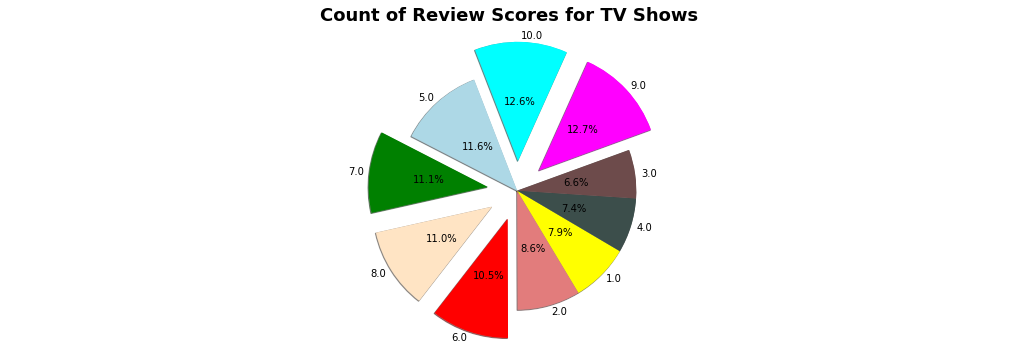

In [35]:
#Plot Pie Chart of the distribution of review scores for TV Shows

pie_data = df_tvshows["review_score"].value_counts()
pie_labels = pie_data.keys()
pie_colors = ["magenta", "cyan", "lightblue", "green", "bisque", "red", 
              "#e27c7c", "yellow", "#3c4e4b", "#6d4b4b"]
pie_explode = (1, 1, 0, 1, 1, 1, 0,
                0, 0, 0)

plt.pie(pie_data, labels = pie_labels, colors = pie_colors, labeldistance = 1.05, autopct="%1.1f%%",
        pctdistance = 0.5, explode = pie_explode, shadow= True, startangle = 20, radius = 4)

#Set title
plt.title("Count of Review Scores for TV Shows", fontsize=18,fontweight = 'bold', y=1)

#Equal aspect ratio ensures that pie chart is drawn as a circle
plt.axis("equal")

#Show graph
plt.show;


### Graph 5 - Distribution of Movie Ratings

In [36]:
#Create dataframe for "Movie" only shows
dfmovie = df2[df2["type"] == "Movie"]
dfmovie

index show_id   type                             title  \
0         0      s1  Movie              Dick Johnson Is Dead   
6         6      s7  Movie  My Little Pony: A New Generation   
7         7      s8  Movie                           Sankofa   
9         9     s10  Movie                      The Starling   
12       12     s13  Movie                      Je Suis Karl   
...     ...     ...    ...                               ...   
8788   8801   s8802  Movie                           Zinzana   
8789   8802   s8803  Movie                            Zodiac   
8791   8804   s8805  Movie                        Zombieland   
8792   8805   s8806  Movie                              Zoom   
8793   8806   s8807  Movie                            Zubaan   

                                                country          date_added  \
0                                         United States  September 25, 2021   
6                                             Undefined  September 24, 2021   
7     United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
9                                         United States  September 24, 2021   
12                              Germany, Czech Republic  September 23, 2021   
...                                                 ...                 ...   
8788                       United Arab Emirates, Jordan       March 9, 2016   
8789                                      United States   November 20, 2019   
8791                                      United States    November 1, 2019   
8792                                      United States    January 11, 2020   
8793                                              India       March 2, 2019   

      year_added  release_year rating  \
0           2021          2020  PG-13   
6           2021          2021     PG   
7           2021          2008  TV-MA   
9           2021          2021  PG-13   
12          2021          2021  TV-MA   
...          ...           ...    ...   
8788        2016          2015  TV-MA   
8789        2019          2008      R   
8791        2019          2009      R   
8792        2020          2008     PG   
8793        2019          2015  TV-14   

                                             listed_in  review_score duration  \
0                                        Documentaries           8.0      NaN   
6                             Children & Family Movies           6.0      NaN   
7     Dramas, Independent Movies, International Movies           8.0      NaN   
9                                     Comedies, Dramas           5.0      NaN   
12                        Dramas, International Movies           9.0      NaN   
...                                                ...           ...      ...   
8788           Dramas, International Movies, Thrillers           6.0      NaN   
8789                    Cult Movies, Dramas, Thrillers           7.0      NaN   
8791                           Comedies, Horror Movies           1.0      NaN   
8792                Children & Family Movies, Comedies           8.0      NaN   
8793    Dramas, International Movies, Music & Musicals           9.0      NaN   

     year_counted  diff_years  
0            2021           1  
6            2021           0  
7            2021          13  
9            2021           0  
12           2021           0  
...           ...         ...  
8788         2016           1  
8789         2019          11  
8791         2019          10  
8792         2020          12  
8793         2019           4  

[6129 rows x 14 columns]

In [37]:
results = Counter()
dfmovie['rating'].str.split(', ').apply(results.update)

dfmovie_rating = pd.DataFrame(results, index=[0]).transpose()
dfmovie_rating.index.name = 'Rating'
dfmovie_rating.columns = ['Count']
dfmovie_rating = dfmovie_rating.reset_index()
dfmovie_rating

Rating  Count
0      PG-13    490
1         PG    287
2      TV-MA   2062
3      TV-PG    540
4      TV-14   1426
5       TV-Y    131
6          R    796
7       TV-G    126
8      TV-Y7    139
9          G     41
10     NC-17      3
11        UR      8
12        NR     75
13  TV-Y7-FV      5

In [38]:
#Sorting the rating by count (Highest to lowest)
dfmovie_rating = dfmovie_rating.sort_values(by='Count', ascending=False)
dfmovie_rating

Rating  Count
2      TV-MA   2062
4      TV-14   1426
6          R    796
3      TV-PG    540
0      PG-13    490
1         PG    287
8      TV-Y7    139
5       TV-Y    131
7       TV-G    126
12        NR     75
9          G     41
11        UR      8
13  TV-Y7-FV      5
10     NC-17      3

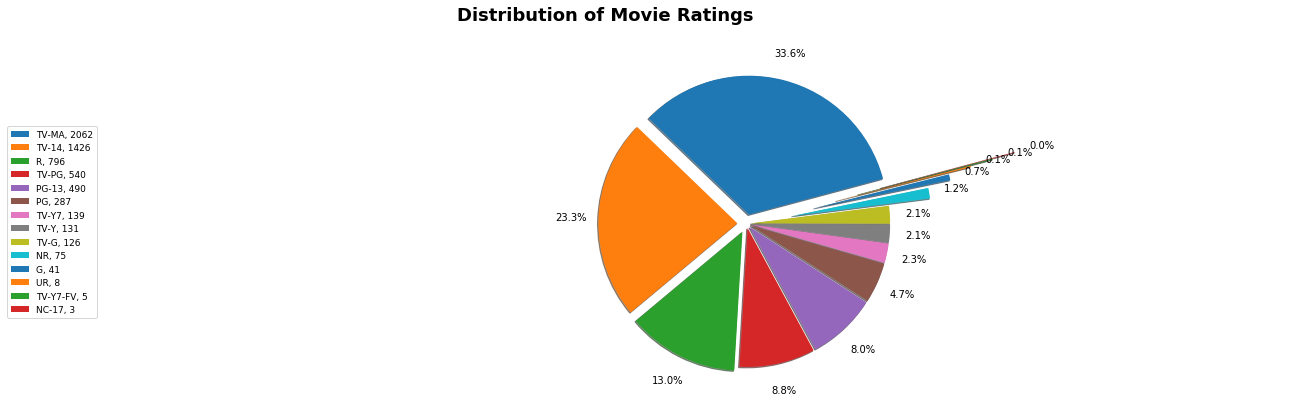

In [39]:
#Plot pie chart of "Distribution of Movie Ratings"
myexplode = [0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 
             0.1, 0.1, 0.1, 1.0, 1.5, 2.0,
             2.5, 3.0]

plt.pie(dfmovie_rating["Count"], autopct="%1.1f%%",
        pctdistance=1.2, shadow=True, startangle=15, radius=3, explode = myexplode)

plt.title("Distribution of Movie Ratings", fontsize=18, fontweight = 'bold', y=1.1, x =0.3) #defining title of pie chart
plt.axis("equal") #equal aspect ratio ensures that pie chart is drawn as a circle
labels = ['%s, %s' % (l, s) for l, s in zip(dfmovie_rating["Rating"], dfmovie_rating["Count"])]
plt.legend(labels=labels, loc='center left', bbox_to_anchor=(-0.3, .5), fontsize=9)
plt.show()

### Graph 6 - Distribution of TV Show Ratings

In [40]:
#Creating dataframe with only TV Shows included
dftv = df2[df2["type"] == "TV Show"]
dftv

index show_id     type                  title  \
1         1      s2  TV Show          Blood & Water   
2         2      s3  TV Show              Ganglands   
3         3      s4  TV Show  Jailbirds New Orleans   
4         4      s5  TV Show           Kota Factory   
5         5      s6  TV Show          Midnight Mass   
...     ...     ...      ...                    ...   
8782   8795   s8796  TV Show        Yu-Gi-Oh! Arc-V   
8783   8796   s8797  TV Show             Yunus Emre   
8784   8797   s8798  TV Show              Zak Storm   
8787   8800   s8801  TV Show     Zindagi Gulzar Hai   
8790   8803   s8804  TV Show            Zombie Dumb   

                                            country          date_added  \
1                                      South Africa  September 24, 2021   
2                                         Undefined  September 24, 2021   
3                                         Undefined  September 24, 2021   
4                                             India  September 24, 2021   
5                                         Undefined  September 24, 2021   
...                                             ...                 ...   
8782                                  Japan, Canada         May 1, 2018   
8783                                         Turkey    January 17, 2017   
8784  United States, France, South Korea, Indonesia  September 13, 2018   
8787                                       Pakistan   December 15, 2016   
8790                                      Undefined        July 1, 2019   

      year_added  release_year rating  \
1           2021          2021  TV-MA   
2           2021          2021  TV-MA   
3           2021          2021  TV-MA   
4           2021          2021  TV-MA   
5           2021          2021  TV-MA   
...          ...           ...    ...   
8782        2018          2015  TV-Y7   
8783        2017          2016  TV-PG   
8784        2018          2016  TV-Y7   
8787        2016          2012  TV-PG   
8790        2019          2018  TV-Y7   

                                              listed_in  review_score  \
1       International TV Shows, TV Dramas, TV Mysteries          10.0   
2     Crime TV Shows, International TV Shows, TV Act...           6.0   
3                                Docuseries, Reality TV           9.0   
4     International TV Shows, Romantic TV Shows, TV ...           7.0   
5                    TV Dramas, TV Horror, TV Mysteries           7.0   
...                                                 ...           ...   
8782                             Anime Series, Kids' TV          10.0   
8783                  International TV Shows, TV Dramas          10.0   
8784                                           Kids' TV           8.0   
8787  International TV Shows, Romantic TV Shows, TV ...           9.0   
8790             Kids' TV, Korean TV Shows, TV Comedies           2.0   

     duration year_counted  diff_years  
1         NaN         2021           0  
2         NaN         2021           0  
3         NaN         2021           0  
4         NaN         2021           0  
5         NaN         2021           0  
...       ...          ...         ...  
8782      NaN         2018           3  
8783      NaN         2017           1  
8784      NaN         2018           2  
8787      NaN         2016           4  
8790      NaN         2019           1  

[2665 rows x 14 columns]

In [41]:
results = Counter()
dftv['rating'].str.split(', ').apply(results.update)

dftv_rating = pd.DataFrame(results, index=[0]).transpose()
dftv_rating.index.name = 'Rating'
dftv_rating.columns = ['Count']
dftv_rating = dftv_rating.reset_index()
dftv_rating

Rating  Count
0     TV-MA   1143
1     TV-14    729
2     TV-Y7    194
3     TV-PG    321
4      TV-Y    175
5      TV-G     94
6         R      2
7        NR      4
8        UR      2
9  TV-Y7-FV      1

In [42]:
#Finding the total count of TV Shows Ratings
Total = dftv_rating['Count'].sum()
print(Total)

2665


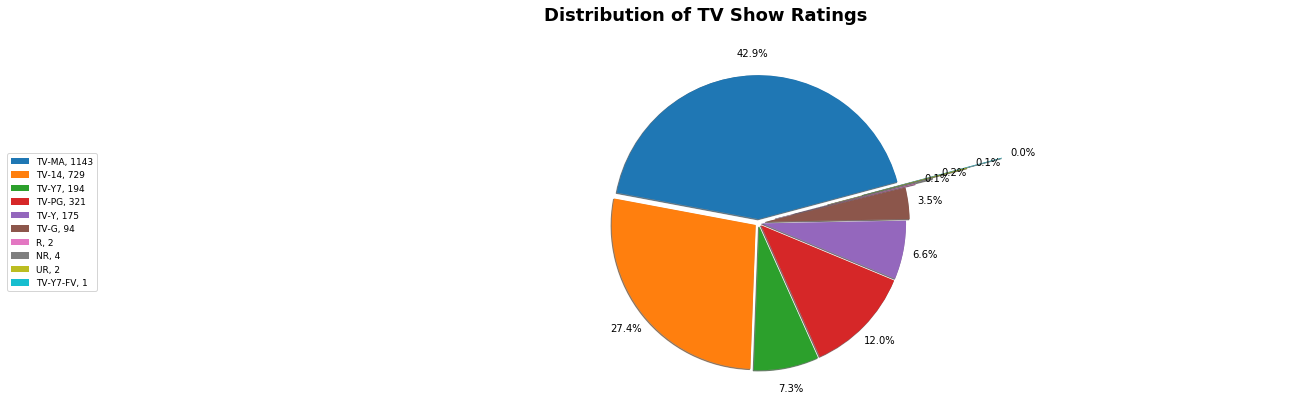

In [43]:
#Plot pie chart of "Distribution of TV Show Ratings"
myexplode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.5, 1., 2.0, 3.0]
plt.pie(dftv_rating["Count"], autopct="%1.1f%%",
        pctdistance=1.15, shadow=True, startangle=15, radius=4, explode = myexplode)

plt.title("Distribution of TV Show Ratings", fontsize=18, fontweight = 'bold', y=1.1, x=0.4) #defining title of pie chart
plt.axis("equal") #equal aspect ratio ensures that pie chart is drawn as a circle
labels = ['%s, %s' % (l, s) for l, s in zip(dftv_rating["Rating"], dftv_rating["Count"])]
plt.legend(labels=labels, loc='center left', bbox_to_anchor=(-0.3, .5), fontsize=9)
plt.show()

### Graph 7 - Rankings of Movie Ratings based on Review Scores 

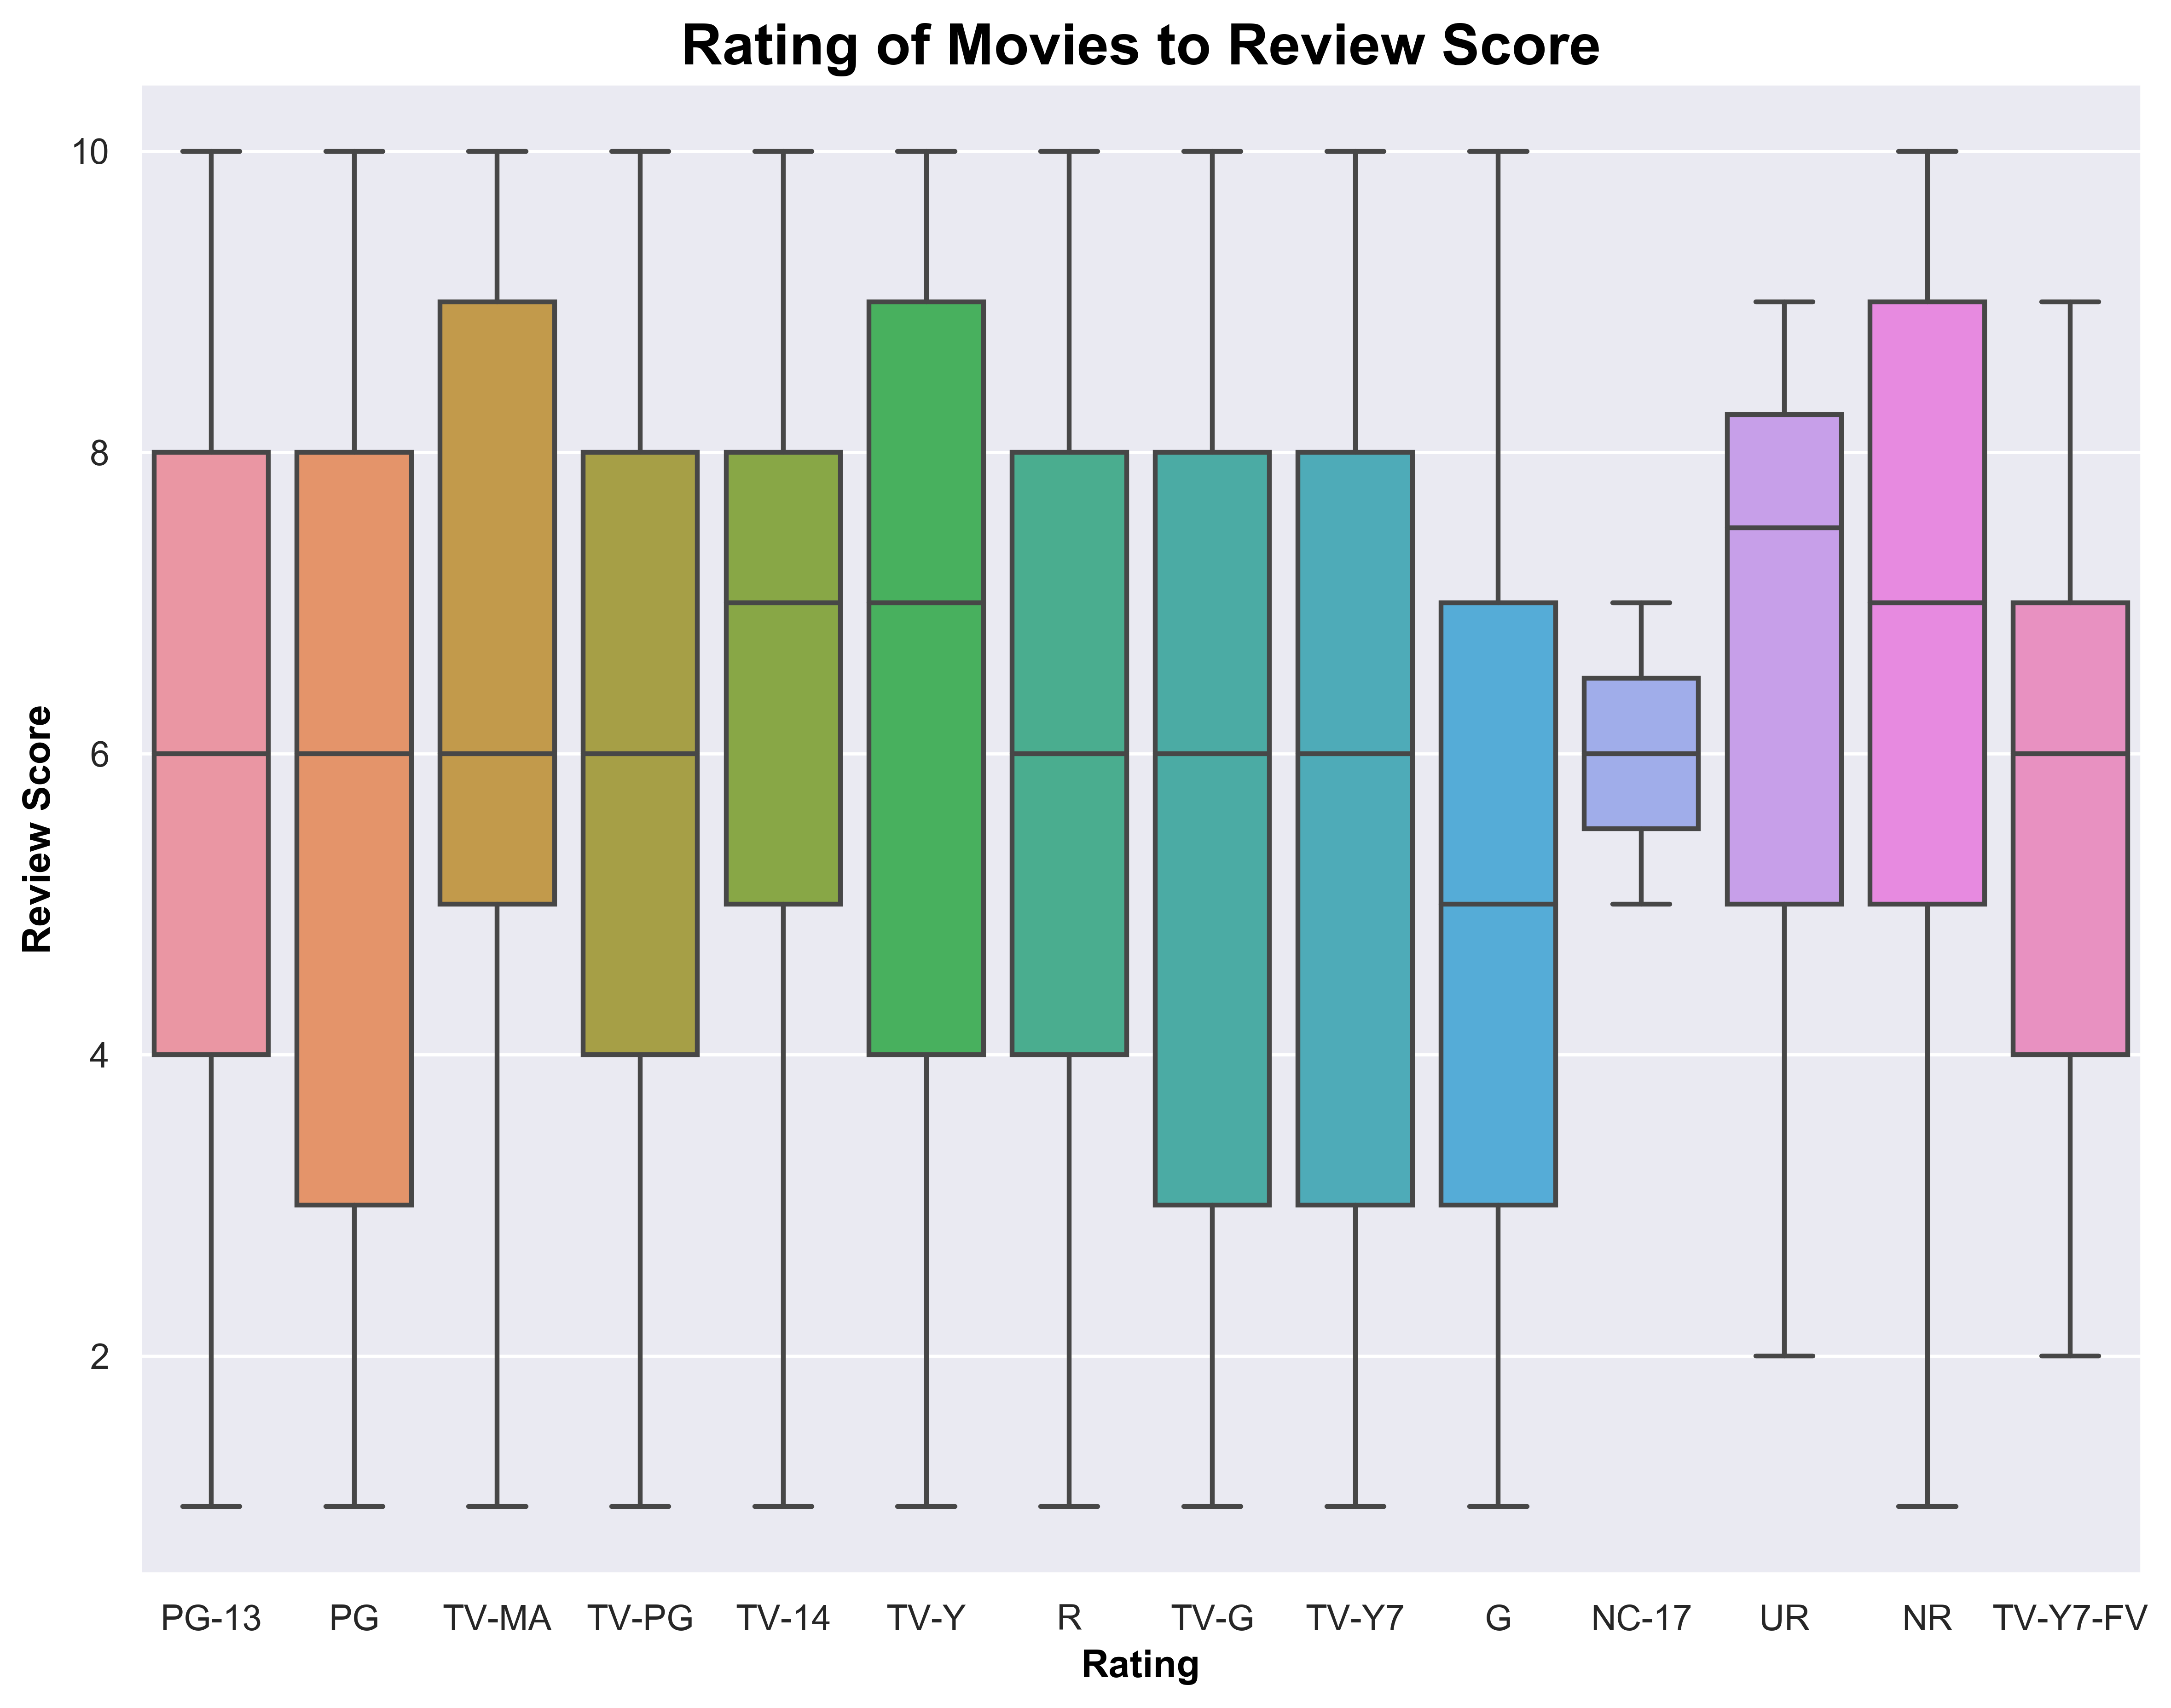

In [84]:
#Creating boxplot chart of rating of Movies to Review Score
sns.boxplot(x = 'rating', y = 'review_score', data = dfmovie,)

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 12,
        }

plt.xlabel('Rating', color = 'black', fontsize = 12, fontweight = 'bold')
plt.ylabel('Review Score',color = 'black', fontsize = 12, fontweight = 'bold');
plt.title("Rating of Movies to Review Score", fontsize=18, fontweight = 'bold', color ='Black')
sns.set(rc={'figure.figsize':(10,8)})
plt.show()

### Graph 8 - Rankings of TV Show Ratings based on Review Scores

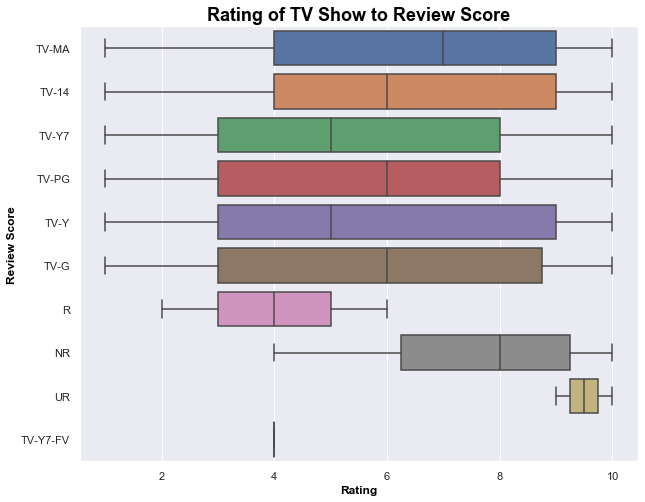

<Figure size 576x432 with 0 Axes>

In [45]:
#Creating boxplot chart of ratings of TV Show to Review Score
sns.boxplot(x = 'review_score', y = 'rating', data = dftv,)

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 12,
        }

plt.xlabel('Rating',color = 'black', fontsize = 12, fontweight = 'bold')
plt.ylabel('Review Score',color = 'black', fontsize = 12, fontweight = 'bold')
plt.title("Rating of TV Show to Review Score", fontsize = 18, fontweight = 'bold', color ='Black')
sns.set(rc={'figure.figsize':(8,6)})
plt.show()
plt.savefig('graph1_ratingtvshow.png')

### Graph 9 - Distribution of Movie Genres

In [46]:
#Create dataframe for "Movie" only shows
dfmovie = df2[df2["type"] == "Movie"]
dfmovie

index show_id   type                             title  \
0         0      s1  Movie              Dick Johnson Is Dead   
6         6      s7  Movie  My Little Pony: A New Generation   
7         7      s8  Movie                           Sankofa   
9         9     s10  Movie                      The Starling   
12       12     s13  Movie                      Je Suis Karl   
...     ...     ...    ...                               ...   
8788   8801   s8802  Movie                           Zinzana   
8789   8802   s8803  Movie                            Zodiac   
8791   8804   s8805  Movie                        Zombieland   
8792   8805   s8806  Movie                              Zoom   
8793   8806   s8807  Movie                            Zubaan   

                                                country          date_added  \
0                                         United States  September 25, 2021   
6                                             Undefined  September 24, 2021   
7     United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
9                                         United States  September 24, 2021   
12                              Germany, Czech Republic  September 23, 2021   
...                                                 ...                 ...   
8788                       United Arab Emirates, Jordan       March 9, 2016   
8789                                      United States   November 20, 2019   
8791                                      United States    November 1, 2019   
8792                                      United States    January 11, 2020   
8793                                              India       March 2, 2019   

      year_added  release_year rating  \
0           2021          2020  PG-13   
6           2021          2021     PG   
7           2021          2008  TV-MA   
9           2021          2021  PG-13   
12          2021          2021  TV-MA   
...          ...           ...    ...   
8788        2016          2015  TV-MA   
8789        2019          2008      R   
8791        2019          2009      R   
8792        2020          2008     PG   
8793        2019          2015  TV-14   

                                             listed_in  review_score duration  \
0                                        Documentaries           8.0      NaN   
6                             Children & Family Movies           6.0      NaN   
7     Dramas, Independent Movies, International Movies           8.0      NaN   
9                                     Comedies, Dramas           5.0      NaN   
12                        Dramas, International Movies           9.0      NaN   
...                                                ...           ...      ...   
8788           Dramas, International Movies, Thrillers           6.0      NaN   
8789                    Cult Movies, Dramas, Thrillers           7.0      NaN   
8791                           Comedies, Horror Movies           1.0      NaN   
8792                Children & Family Movies, Comedies           8.0      NaN   
8793    Dramas, International Movies, Music & Musicals           9.0      NaN   

     year_counted  diff_years  
0            2021           1  
6            2021           0  
7            2021          13  
9            2021           0  
12           2021           0  
...           ...         ...  
8788         2016           1  
8789         2019          11  
8791         2019          10  
8792         2020          12  
8793         2019           4  

[6129 rows x 14 columns]

In [47]:
#Sort Movies by their genre and count how many times each genre appeared
results = Counter()
dfmovie['listed_in'].str.split(', ').apply(results.update)

dfmoviecount = pd.DataFrame(results, index=[0]).transpose()
dfmoviecount.index.name = 'Movie Genre'
dfmoviecount.columns = ['Count']
dfmoviecount = dfmoviecount.reset_index()
dfmoviecount

Movie Genre  Count
0              Documentaries    869
1   Children & Family Movies    641
2                     Dramas   2425
3         Independent Movies    755
4       International Movies   2752
5                   Comedies   1673
6                  Thrillers    576
7            Romantic Movies    616
8           Music & Musicals    375
9              Horror Movies    357
10          Sci-Fi & Fantasy    243
11        Action & Adventure    859
12            Classic Movies    116
13            Anime Features     71
14             Sports Movies    219
15               Cult Movies     71
16      Faith & Spirituality     65
17              LGBTQ Movies    102
18           Stand-Up Comedy    343
19                    Movies     57

In [48]:
#Sort Movie Count by Descending order
dfmoviecount_sort = dfmoviecount.sort_values(by='Count', ascending=False)
dfmoviecount_sort

Movie Genre  Count
4       International Movies   2752
2                     Dramas   2425
5                   Comedies   1673
0              Documentaries    869
11        Action & Adventure    859
3         Independent Movies    755
1   Children & Family Movies    641
7            Romantic Movies    616
6                  Thrillers    576
8           Music & Musicals    375
9              Horror Movies    357
18           Stand-Up Comedy    343
10          Sci-Fi & Fantasy    243
14             Sports Movies    219
12            Classic Movies    116
17              LGBTQ Movies    102
13            Anime Features     71
15               Cult Movies     71
16      Faith & Spirituality     65
19                    Movies     57

In [49]:
#Get total amount of Movie count
Total = dfmoviecount_sort['Count'].sum()
print(Total)

13185


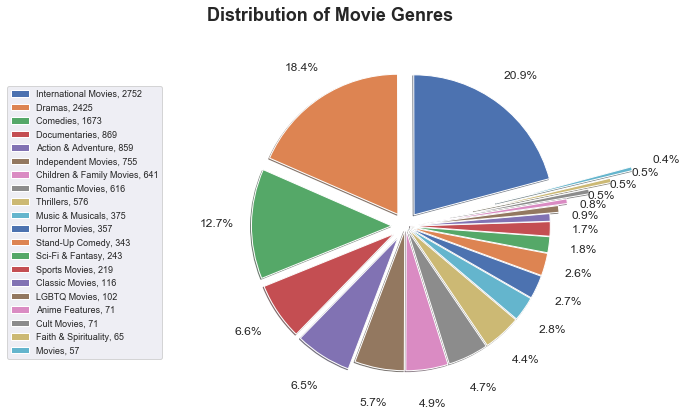

In [50]:
#Creating Pie Chart

pie_explode = (0.3, 0.3, 0.3, 0.3, 0.3,
                0.1, 0.1, 0.1, 0.1, 0.1,
                0.1, 0.1, 0.1, 0.1, 0.1,
                0.3, 0.5, 1.0, 1.5, 2.0,)

plt.pie(dfmoviecount_sort["Count"], autopct="%1.1f%%",
        pctdistance=1.25, explode=pie_explode, shadow=True, startangle=15, radius=3)

plt.title("Distribution of Movie Genres", fontsize = 18, fontweight = 'bold', y=1.1, x=0.25) #defining title of pie chart
plt.axis("equal") #equal aspect ratio ensures that pie chart is drawn as a circle
labels = ['%s, %s' % (l, s) for l, s in zip(dfmoviecount_sort["Movie Genre"], dfmoviecount_sort["Count"])] #Create label
plt.legend(labels=labels, loc='center', bbox_to_anchor=(-0.3, .5), fontsize=9) #Create legend
plt.show()

### Graph 10 - Distribution of TV Show Genres

In [51]:
#Creating dataframe with only TV Shows included
dftv = df2[df2["type"] == "TV Show"]
dftv

index show_id     type                  title  \
1         1      s2  TV Show          Blood & Water   
2         2      s3  TV Show              Ganglands   
3         3      s4  TV Show  Jailbirds New Orleans   
4         4      s5  TV Show           Kota Factory   
5         5      s6  TV Show          Midnight Mass   
...     ...     ...      ...                    ...   
8782   8795   s8796  TV Show        Yu-Gi-Oh! Arc-V   
8783   8796   s8797  TV Show             Yunus Emre   
8784   8797   s8798  TV Show              Zak Storm   
8787   8800   s8801  TV Show     Zindagi Gulzar Hai   
8790   8803   s8804  TV Show            Zombie Dumb   

                                            country          date_added  \
1                                      South Africa  September 24, 2021   
2                                         Undefined  September 24, 2021   
3                                         Undefined  September 24, 2021   
4                                             India  September 24, 2021   
5                                         Undefined  September 24, 2021   
...                                             ...                 ...   
8782                                  Japan, Canada         May 1, 2018   
8783                                         Turkey    January 17, 2017   
8784  United States, France, South Korea, Indonesia  September 13, 2018   
8787                                       Pakistan   December 15, 2016   
8790                                      Undefined        July 1, 2019   

      year_added  release_year rating  \
1           2021          2021  TV-MA   
2           2021          2021  TV-MA   
3           2021          2021  TV-MA   
4           2021          2021  TV-MA   
5           2021          2021  TV-MA   
...          ...           ...    ...   
8782        2018          2015  TV-Y7   
8783        2017          2016  TV-PG   
8784        2018          2016  TV-Y7   
8787        2016          2012  TV-PG   
8790        2019          2018  TV-Y7   

                                              listed_in  review_score  \
1       International TV Shows, TV Dramas, TV Mysteries          10.0   
2     Crime TV Shows, International TV Shows, TV Act...           6.0   
3                                Docuseries, Reality TV           9.0   
4     International TV Shows, Romantic TV Shows, TV ...           7.0   
5                    TV Dramas, TV Horror, TV Mysteries           7.0   
...                                                 ...           ...   
8782                             Anime Series, Kids' TV          10.0   
8783                  International TV Shows, TV Dramas          10.0   
8784                                           Kids' TV           8.0   
8787  International TV Shows, Romantic TV Shows, TV ...           9.0   
8790             Kids' TV, Korean TV Shows, TV Comedies           2.0   

     duration year_counted  diff_years  
1         NaN         2021           0  
2         NaN         2021           0  
3         NaN         2021           0  
4         NaN         2021           0  
5         NaN         2021           0  
...       ...          ...         ...  
8782      NaN         2018           3  
8783      NaN         2017           1  
8784      NaN         2018           2  
8787      NaN         2016           4  
8790      NaN         2019           1  

[2665 rows x 14 columns]

In [52]:
#Finding the Genres of TV Shows and their count
results = Counter()
dftv['listed_in'].str.split(', ').apply(results.update)

dftvcount = pd.DataFrame(results, index=[0]).transpose()
dftvcount.index.name = 'TV Show Genre'
dftvcount.columns = ['Count']
dftvcount = dftvcount.reset_index()
dftvcount

TV Show Genre  Count
0         International TV Shows   1349
1                      TV Dramas    761
2                   TV Mysteries     98
3                 Crime TV Shows    469
4          TV Action & Adventure    167
5                     Docuseries    394
6                     Reality TV    255
7              Romantic TV Shows    370
8                    TV Comedies    574
9                      TV Horror     75
10              British TV Shows    252
11     Spanish-Language TV Shows    173
12                  TV Thrillers     57
13                      Kids' TV    449
14           TV Sci-Fi & Fantasy     83
15                  Anime Series    175
16               Korean TV Shows    151
17           Science & Nature TV     92
18                 Teen TV Shows     69
19                      TV Shows     16
20  Stand-Up Comedy & Talk Shows     56
21             Classic & Cult TV     26

In [53]:
#Finding the total count of Genres of TV Shows
Total = dftvcount['Count'].sum()
print(Total)

6111


In [54]:
#Sorting the count by descending order
dftvcount_sort = dftvcount.sort_values(by='Count', ascending=False)
dftvcount_sort

TV Show Genre  Count
0         International TV Shows   1349
1                      TV Dramas    761
8                    TV Comedies    574
3                 Crime TV Shows    469
13                      Kids' TV    449
5                     Docuseries    394
7              Romantic TV Shows    370
6                     Reality TV    255
10              British TV Shows    252
15                  Anime Series    175
11     Spanish-Language TV Shows    173
4          TV Action & Adventure    167
16               Korean TV Shows    151
2                   TV Mysteries     98
17           Science & Nature TV     92
14           TV Sci-Fi & Fantasy     83
9                      TV Horror     75
18                 Teen TV Shows     69
12                  TV Thrillers     57
20  Stand-Up Comedy & Talk Shows     56
21             Classic & Cult TV     26
19                      TV Shows     16

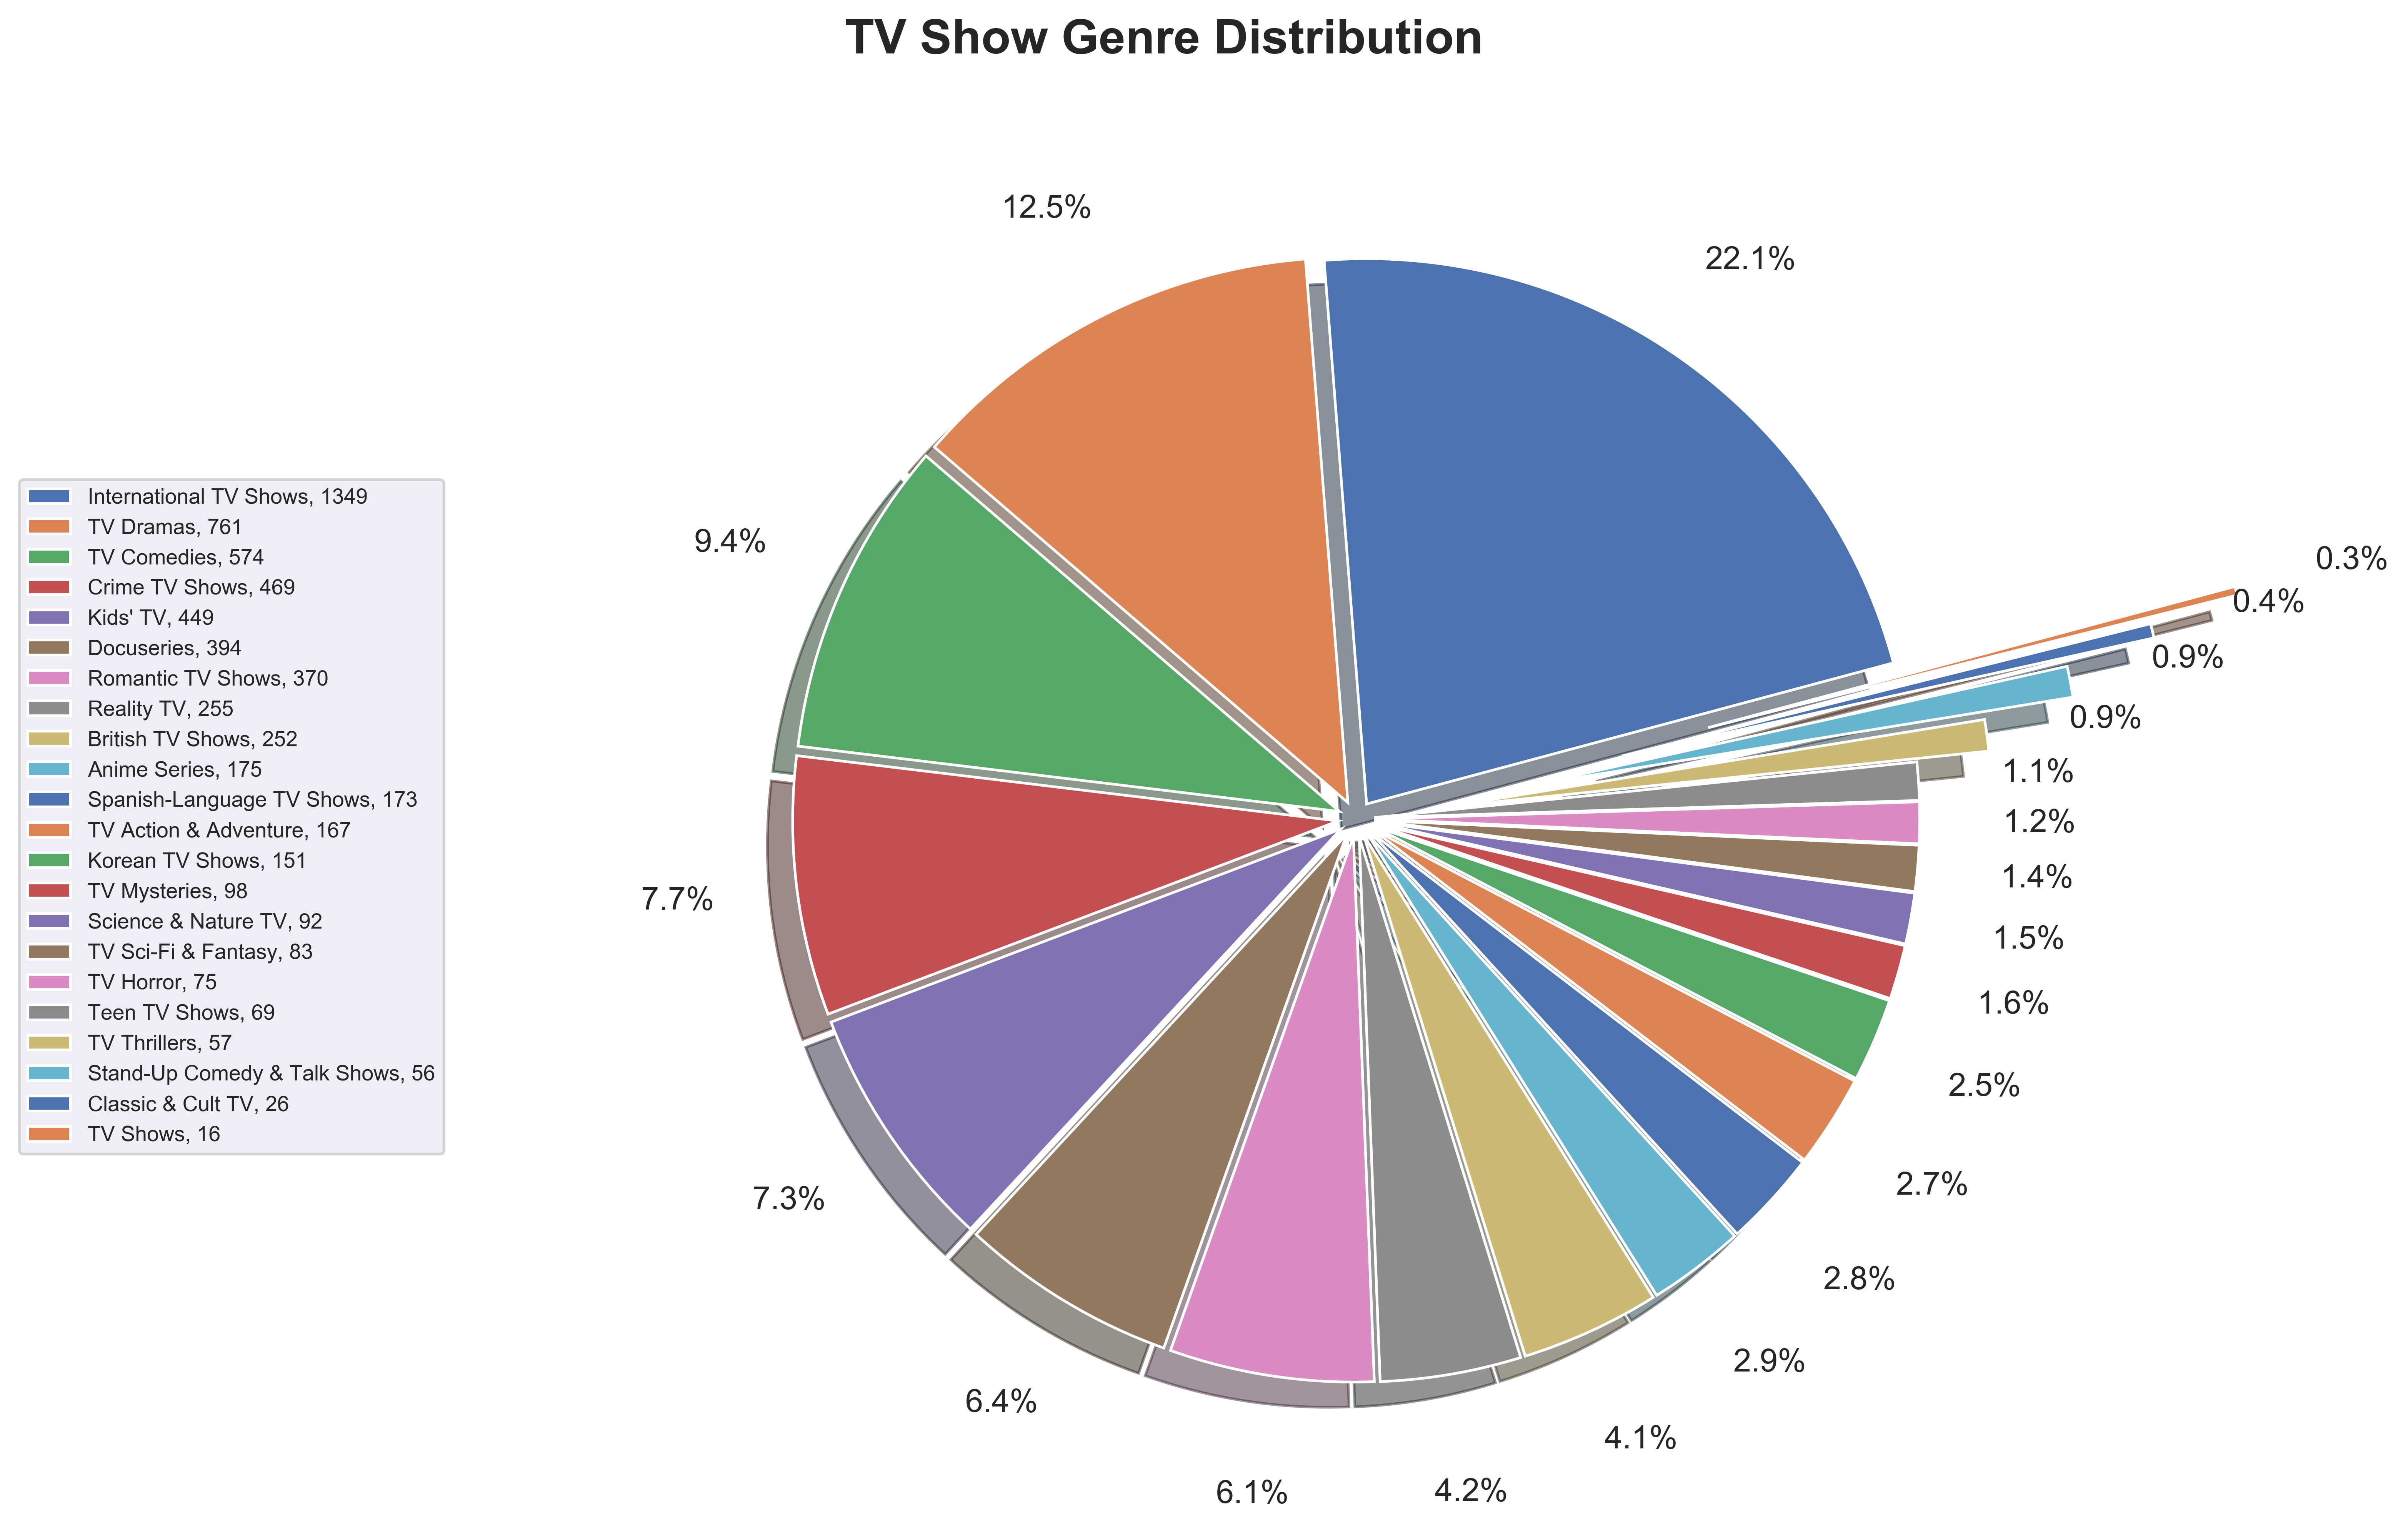

<Figure size 5000x4000 with 0 Axes>

In [85]:
#Creating Pie Chart
pie_explode1 = (0.1, 0.1, 0.1, 0.1, 0.1,
                0.1, 0.1, 0.1, 0.1, 0.1,
                0.1, 0.1, 0.1, 0.1, 0.1,
                0.1, 0.1, 0.1, 0.5, 1.0,
                1.5, 2.0)
plt.pie(dftvcount_sort["Count"], autopct="%1.1f%%",
        pctdistance=1.22, explode=pie_explode1, shadow=True, startangle=15, radius=3)

plt.title("TV Show Genre Distribution", fontsize = 18, fontweight = 'bold', y=1.1, loc = 'left', x=0.1) #defining title of pie chart
plt.axis("equal") #equal aspect ratio ensures that pie chart is drawn as a circle
labels = ['%s, %s' % (l, s) for l, s in zip(dftvcount_sort["TV Show Genre"], dftvcount_sort["Count"])]
plt.legend(labels=labels, loc='center left', bbox_to_anchor=(-0.4, .5), fontsize=8)
plt.show()

plt.savefig('tvshow genre.png')

### Graph 11 - Preferred Genre of Subscribers

In [56]:
df5 = df2
df5['review_score'] = df5['review_score'].astype(int)

In [57]:
#Finding out the preferred genre when review is 8
review_8 = df5.loc[df5['review_score'] == 8]
r_8 = Counter()
review_8['listed_in'].str.split(', ').apply(r_8.update)
r_8 = pd.DataFrame(r_8, index=[0]).transpose()
r_8.index.name = 'Genre'
r_8.columns = ['8.0']
r_8 = r_8.reset_index()

In [58]:
#Finding out the preferred genre when review is 9
review_9 = df5.loc[df5['review_score'] == 9]
r_9 = Counter()
review_9['listed_in'].str.split(', ').apply(r_9.update)
r_9 = pd.DataFrame(r_9, index=[0]).transpose()
r_9.index.name = 'Genre'
r_9.columns = ['9.0']
r_9 = r_9.reset_index()

In [59]:
#Finding out the preferred genre when review is 10
review_10 = df5.loc[df5['review_score'] == 10]
r_10 = Counter()
review_10['listed_in'].str.split(', ').apply(r_10.update)
r_10 = pd.DataFrame(r_10, index=[0]).transpose()
r_10.index.name = 'Genre'
r_10.columns = ['10.0']
r_10 = r_10.reset_index()

In [60]:
dfs = [r_8, r_9, r_10]
venise_4 = ft.reduce(lambda left, right: pd.merge(left, right, on='Genre'), dfs)
venise_4['higher_reviews'] = venise_4['8.0']+venise_4['9.0']+venise_4['10.0']

In [61]:
#Finding out the preferred genre when review is 1
review_1 = df5.loc[df5['review_score'] == 1]
r_1 = Counter()
review_1['listed_in'].str.split(', ').apply(r_1.update)
r_1 = pd.DataFrame(r_1, index=[0]).transpose()
r_1.index.name = 'Genre'
r_1.columns = ['1.0']
r_1 = r_1.reset_index()

In [62]:
#Finding out the preferred genre when review is 2
review_2 = df5.loc[df5['review_score'] == 2]
r_2 = Counter()
review_2['listed_in'].str.split(', ').apply(r_2.update)
r_2 = pd.DataFrame(r_2, index=[0]).transpose()
r_2.index.name = 'Genre'
r_2.columns = ['2.0']
r_2 = r_2.reset_index()

In [63]:
#Finding out the preferred genre when review is 3
review_3 = df5.loc[df5['review_score'] == 3]
r_3 = Counter()
review_3['listed_in'].str.split(', ').apply(r_3.update)
r_3 = pd.DataFrame(r_3, index=[0]).transpose()
r_3.index.name = 'Genre'
r_3.columns = ['3.0']
r_3 = r_3.reset_index()

In [64]:
dfs = [r_1, r_2, r_3]
venise_5 = ft.reduce(lambda left, right: pd.merge(left, right, on='Genre'), dfs)
venise_5['lower_reviews'] = venise_5['1.0']+venise_5['2.0']+venise_5['3.0']
venise_genre = pd.merge(venise_4, venise_5, on ='Genre')
venise_genre['difference'] = (venise_genre['higher_reviews']-venise_genre['lower_reviews']).abs()
venise_genre = venise_genre.sort_values(['higher_reviews','difference'], ascending=False)
venise_genre = venise_genre.nlargest(10, 'difference')

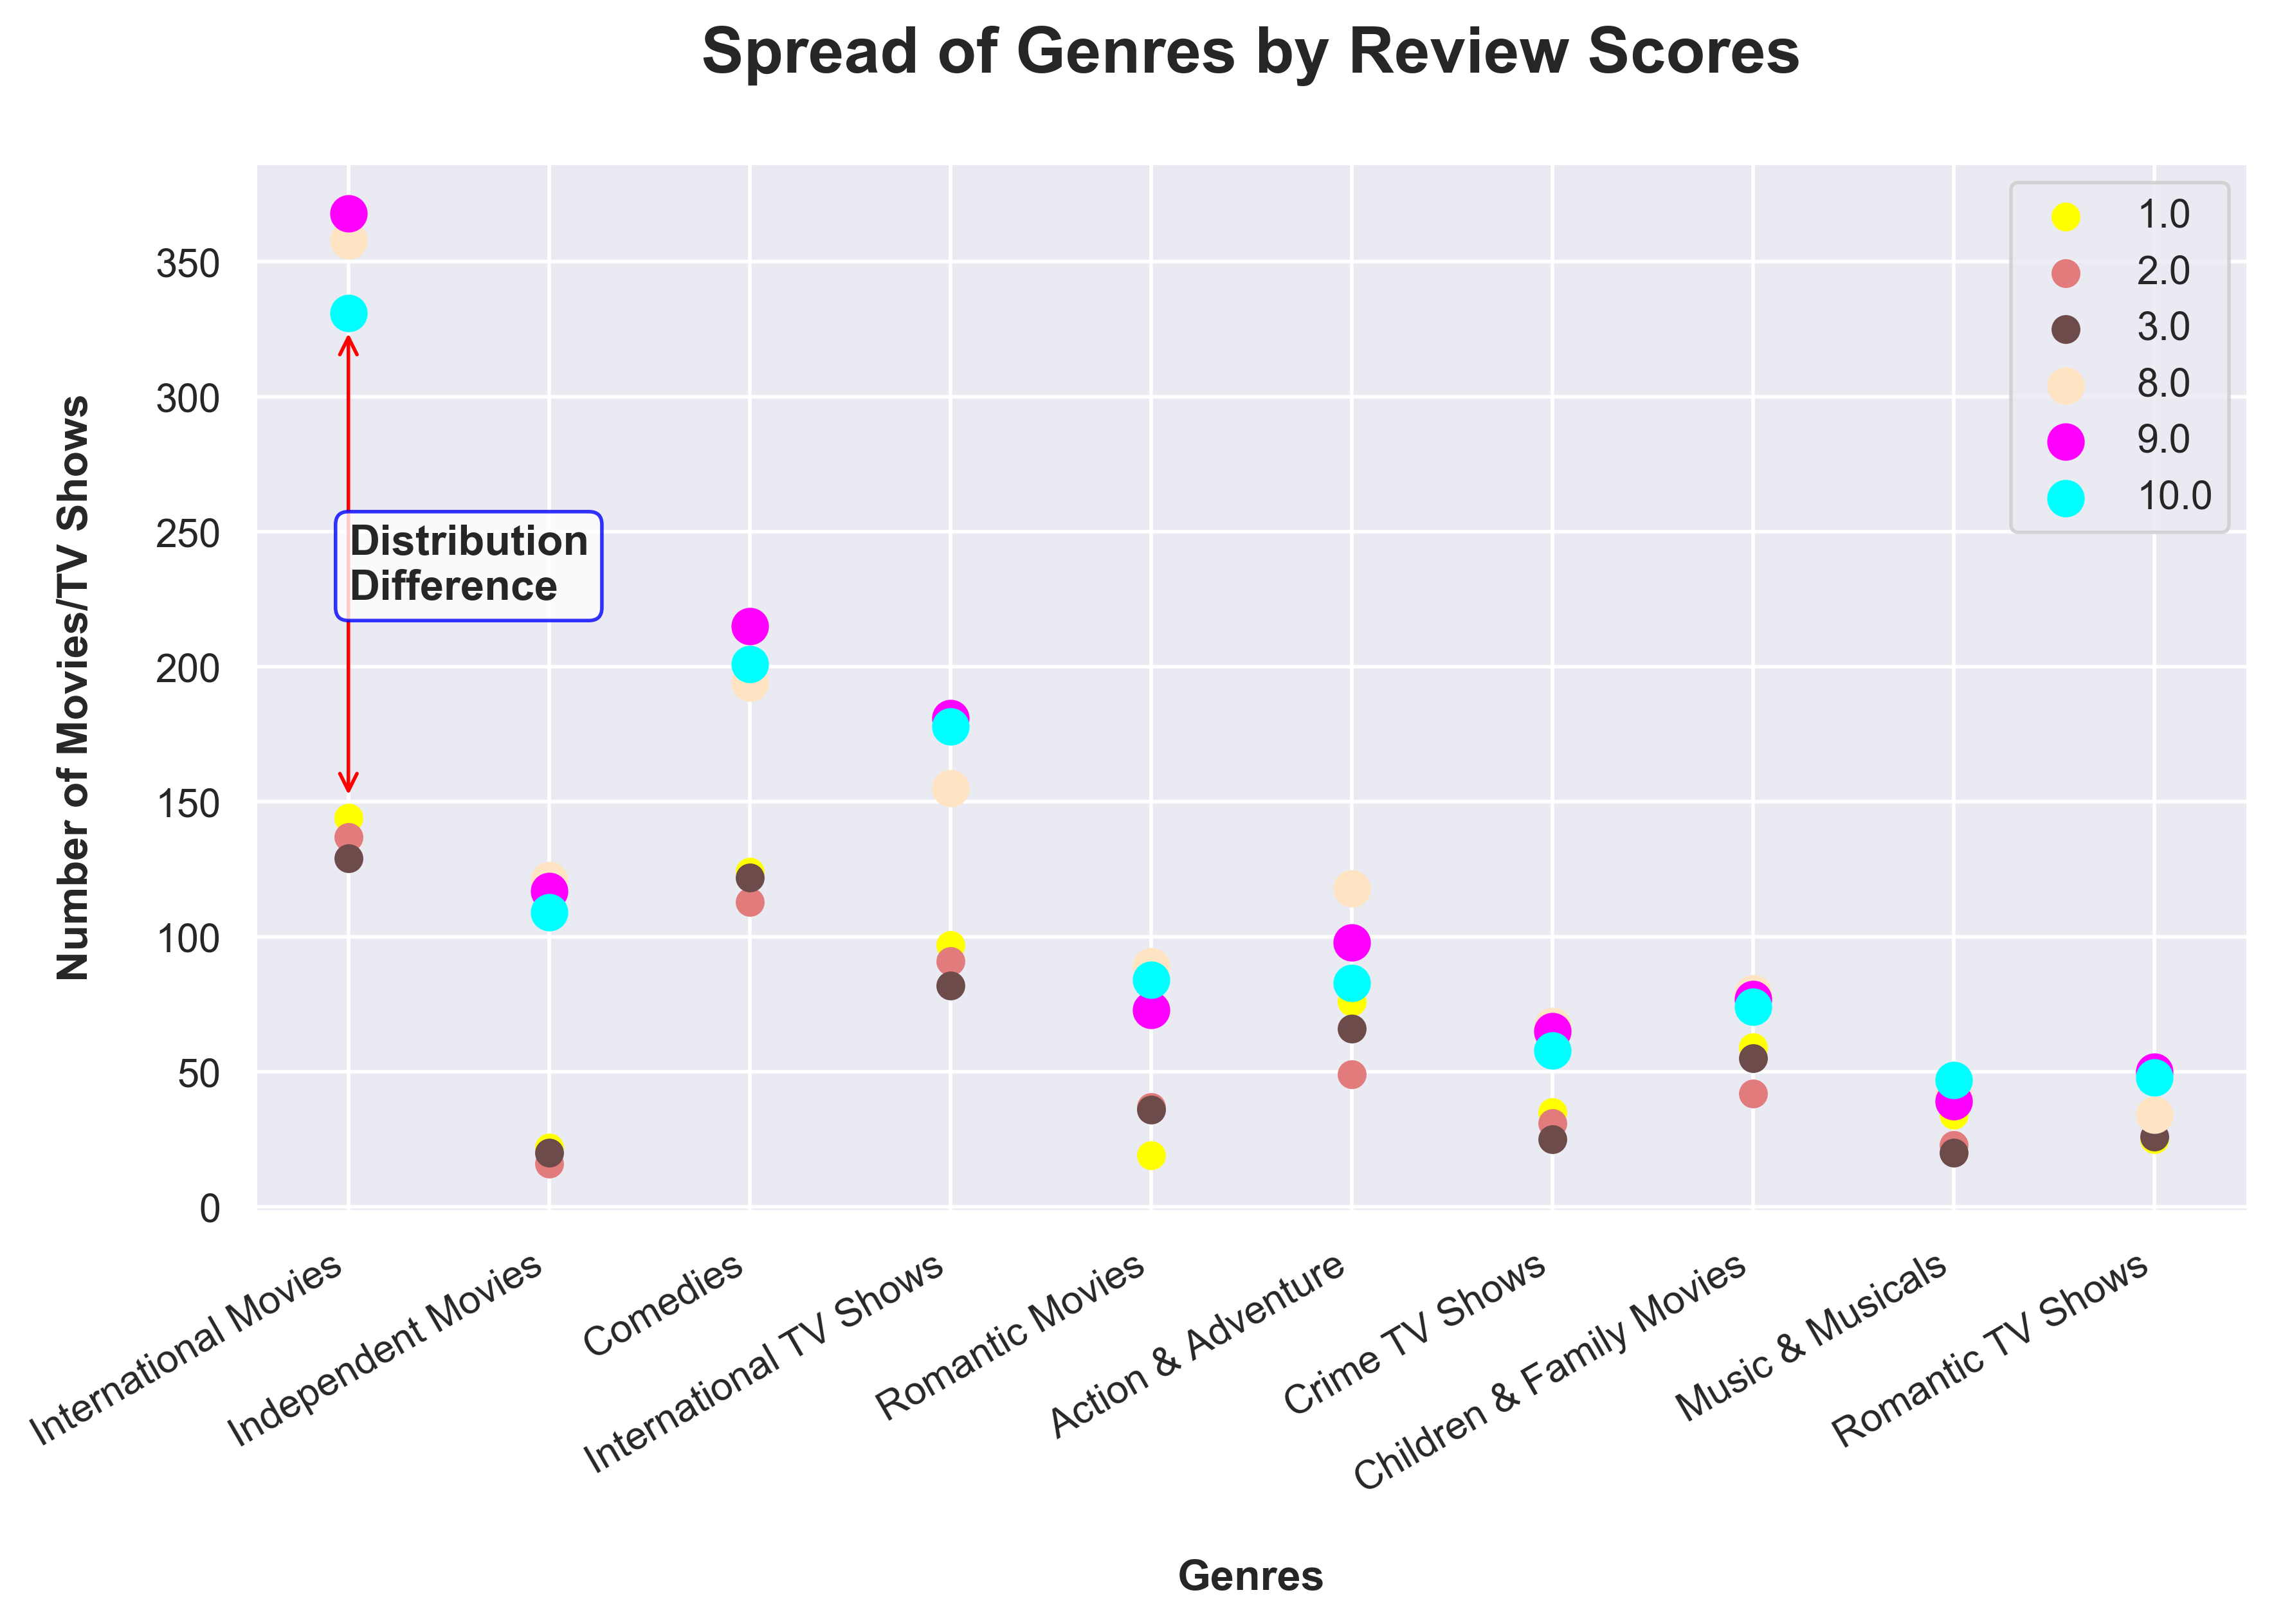

In [65]:
#Creating Scatter Plot
plt.figure(figsize=(10,6), dpi=400)
plt.scatter(x=venise_genre['Genre'], y=venise_genre['1.0'], s=50, c='yellow')
plt.scatter(x=venise_genre['Genre'], y=venise_genre['2.0'], s=50, c='#e27c7c')
plt.scatter(x=venise_genre['Genre'], y=venise_genre['3.0'], s=50, c='#6d4b4b')
plt.scatter(x=venise_genre['Genre'], y=venise_genre['8.0'], s=90, c='bisque')
plt.scatter(x=venise_genre['Genre'], y=venise_genre['9.0'], s=90, c='magenta')
plt.scatter(x=venise_genre['Genre'], y=venise_genre['10.0'], s=90, c='cyan')

#Adjusting the bar size and titles in the graph
plt.legend(['1.0','2.0','3.0','8.0','9.0','10.0'])

plt.annotate('', xy=('International Movies', 150), xytext=('International Movies', 335),
            arrowprops=dict(arrowstyle='<->', color='red'),
            bbox=dict(boxstyle="rarrow,pad=0.3", fc="cyan", ec="b", lw=2))

plt.annotate('Distribution\nDifference', xy=('International Movies', 225), xytext=(0,225), 
             horizontalalignment='left', fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='blue', pad=0.3))

plt.title('Spread of Genres by Review Scores\n', fontsize = 18, fontweight = 'bold')
plt.xlabel('\nGenres', fontsize = 12, fontweight = 'bold')
plt.ylabel('Number of Movies/TV Shows\n', fontsize = 12, fontweight = 'bold')

plt.gcf().autofmt_xdate()

### Graph 12 - Count of Movie/TV Show Production by Region

In [66]:
df3 = df2

In [67]:
#Hot En-coding to find country
countries = np.unique(', '.join(df3['country']).split(', '))

In [68]:
allc_regions = pd.read_csv("Countries and Regions.csv")
r_dict = allc_regions.set_index('Country').T.to_dict('Region/Continent')
r_dict = r_dict[0]

In [69]:
#Duplicating column and replacing country to their regions
duplicate = df3.loc[:,'country']
df3.insert(5, "dup_country", duplicate, True)
df3['dup_country'] = df3['dup_country'].replace(r_dict, regex=True)

In [70]:
#Assume and find the region which have the highest number of occurance
df3['region_counter'] = df3['dup_country'].str.split(', ').apply(Counter)

#Finding the highest occurance of region
i = 0
region = []
for test in df3['region_counter']:
    test1 = dict(df3['region_counter'][i])
    region.append(test1)
    i = i+1
    
region = pd.DataFrame(region)
region = region.fillna(0).astype(int)
region['region'] = region.idxmax(axis=1)
region = region['region']
df3.insert(5, "region", region, True)
df3.loc[df3['show_id']=='s5613', 'region'] = "Europe"

In [71]:
df3 = df3.drop(['dup_country'], axis=1)

In [72]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8794 entries, 0 to 8793
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           8794 non-null   int64 
 1   show_id         8794 non-null   object
 2   type            8794 non-null   object
 3   title           8794 non-null   object
 4   country         8794 non-null   object
 5   region          8794 non-null   object
 6   date_added      8794 non-null   object
 7   year_added      8794 non-null   int32 
 8   release_year    8794 non-null   int64 
 9   rating          8794 non-null   object
 10  listed_in       8794 non-null   object
 11  review_score    8794 non-null   int32 
 12  duration        3 non-null      object
 13  year_counted    8794 non-null   object
 14  diff_years      8794 non-null   int64 
 15  region_counter  8794 non-null   object
dtypes: int32(2), int64(3), object(11)
memory usage: 1.0+ MB


In [73]:
graph3 = df3.iloc[:,[5,10]]
region_count = graph3.groupby('region').region.count()
region_count = pd.DataFrame(region_count)
region_count.index.name = 'Region'
region_count.columns = ['Count']
region_count = region_count.reset_index()
region_count = region_count.sort_values(by=['Count'], ascending=False)

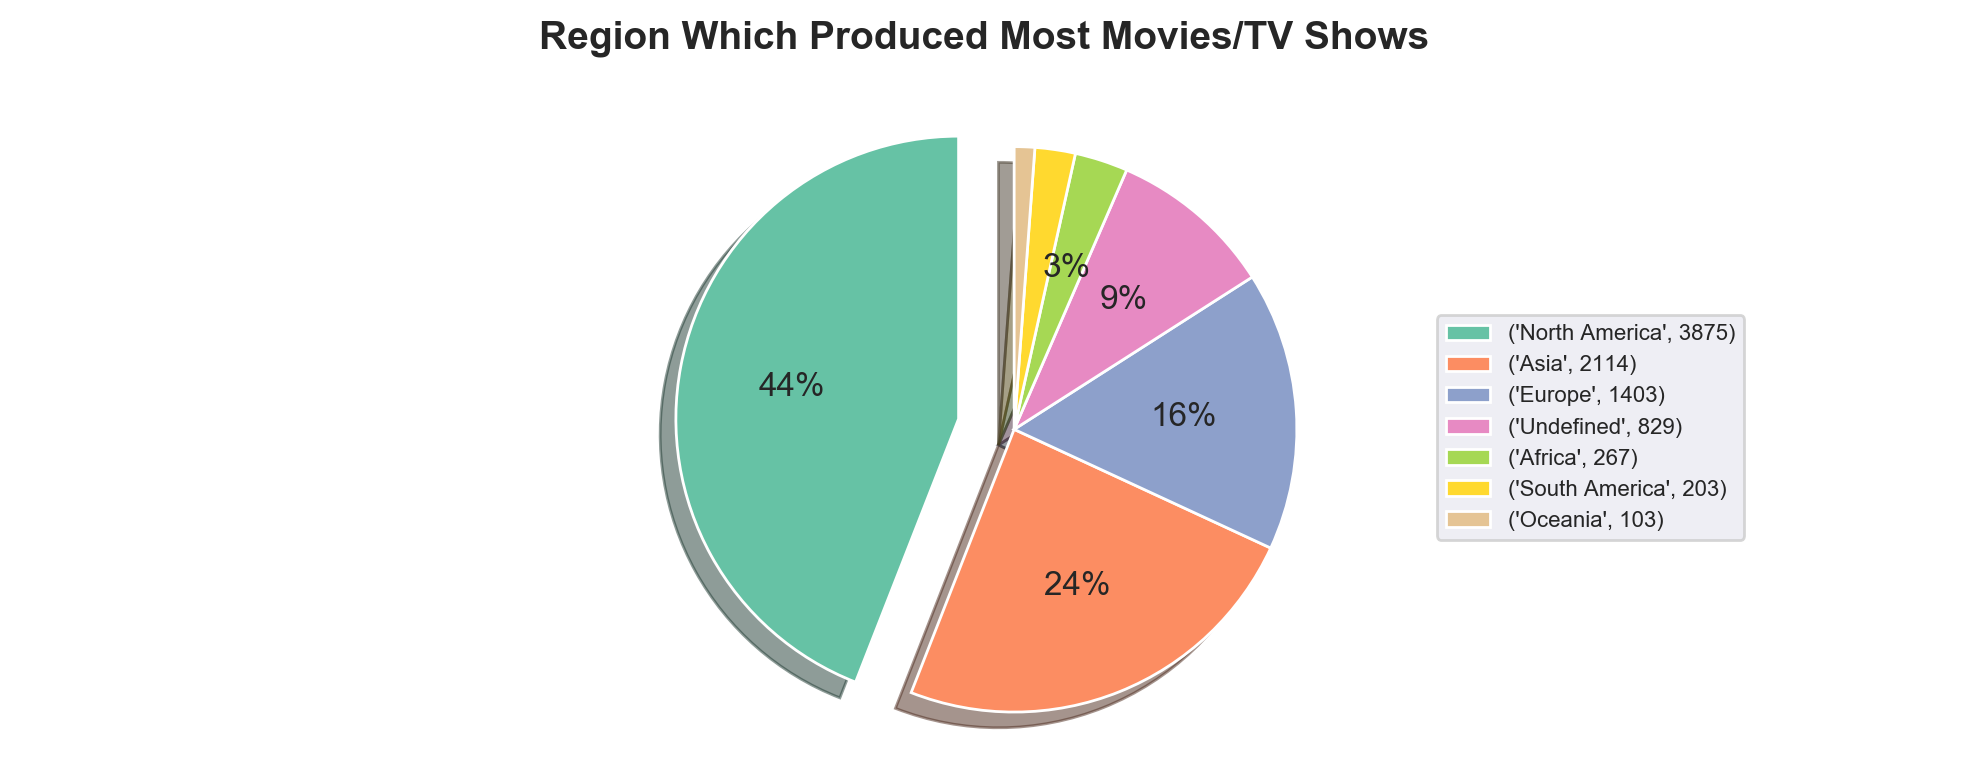

In [74]:
#Creating Pie Chart
def my_autopct(pct):
    return ('%1.f%%' % pct) if pct > 3 else ''

explode=[0.2, 0, 0, 0, 0, 0, 0]
plt.figure(figsize=(10,4), dpi=200, facecolor='white')
sizes = region_count['Count']
labels = region_count['Region']
plt.pie(sizes, autopct=my_autopct, shadow = True, colors=sns.color_palette('Set2'), startangle=90, explode = explode)
plt.axis('equal')
plt.title('Region Which Produced Most Movies/TV Shows\n', fontsize = 14, fontweight = 'bold')
plt.legend(labels=[(l,s) for l, s in zip(labels,sizes)], loc = "center right", prop={'size':8}, bbox_to_anchor=(0.9,0.5))
plt.tight_layout()

#plt.savefig('graph9_venise.png')

### Graph 13 - Distribution of Review Scores by Region

In [75]:
venise_bxplt = df3.iloc[:,[5,11]]
venise_bxplt

region  review_score
0     North America             8
1            Africa            10
2         Undefined             6
3         Undefined             9
4              Asia             7
...             ...           ...
8789  North America             7
8790      Undefined             2
8791  North America             1
8792  North America             8
8793           Asia             9

[8794 rows x 2 columns]

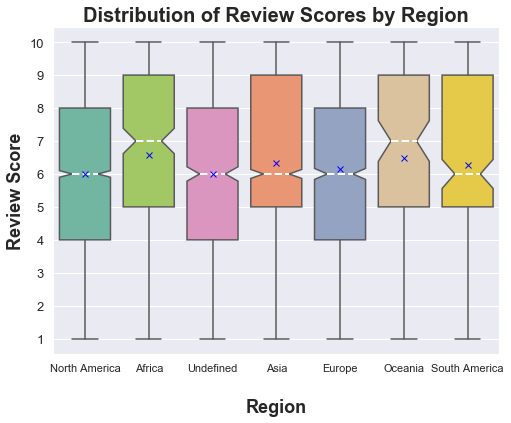

In [76]:
colors = ['#66c2a5','#a6d854','#e78ac3','#fc8d62','#8da0cb','#e5c494','#ffd92f']
sns.boxplot(x = 'region', y = 'review_score', data = venise_bxplt, showmeans=True, 
            meanprops={"marker":"x","markerfacecolor":"white", "markeredgecolor":"blue"}, 
            palette=colors, notch=True, medianprops={'linestyle': '--', 'linewidth': 2, 'color':'white'})
sns.set(rc={'figure.figsize':(15,6), 'figure.dpi':500})
sns.set_style("whitegrid")

#Labelling the graph
y_ticks = np.arange(1,11,1)
plt.yticks(y_ticks, fontsize=13)
plt.title('Distribution of Review Scores by Region', fontsize = 20, fontweight = 'bold')
plt.xlabel('\nRegion', fontsize = 18, fontweight = 'bold')
plt.ylabel('Review Score', fontsize = 18, fontweight = 'bold')
plt.show()
#plt.savefig('graph_venise.pdf')

### Graph 14 - Total Count of Review Scores

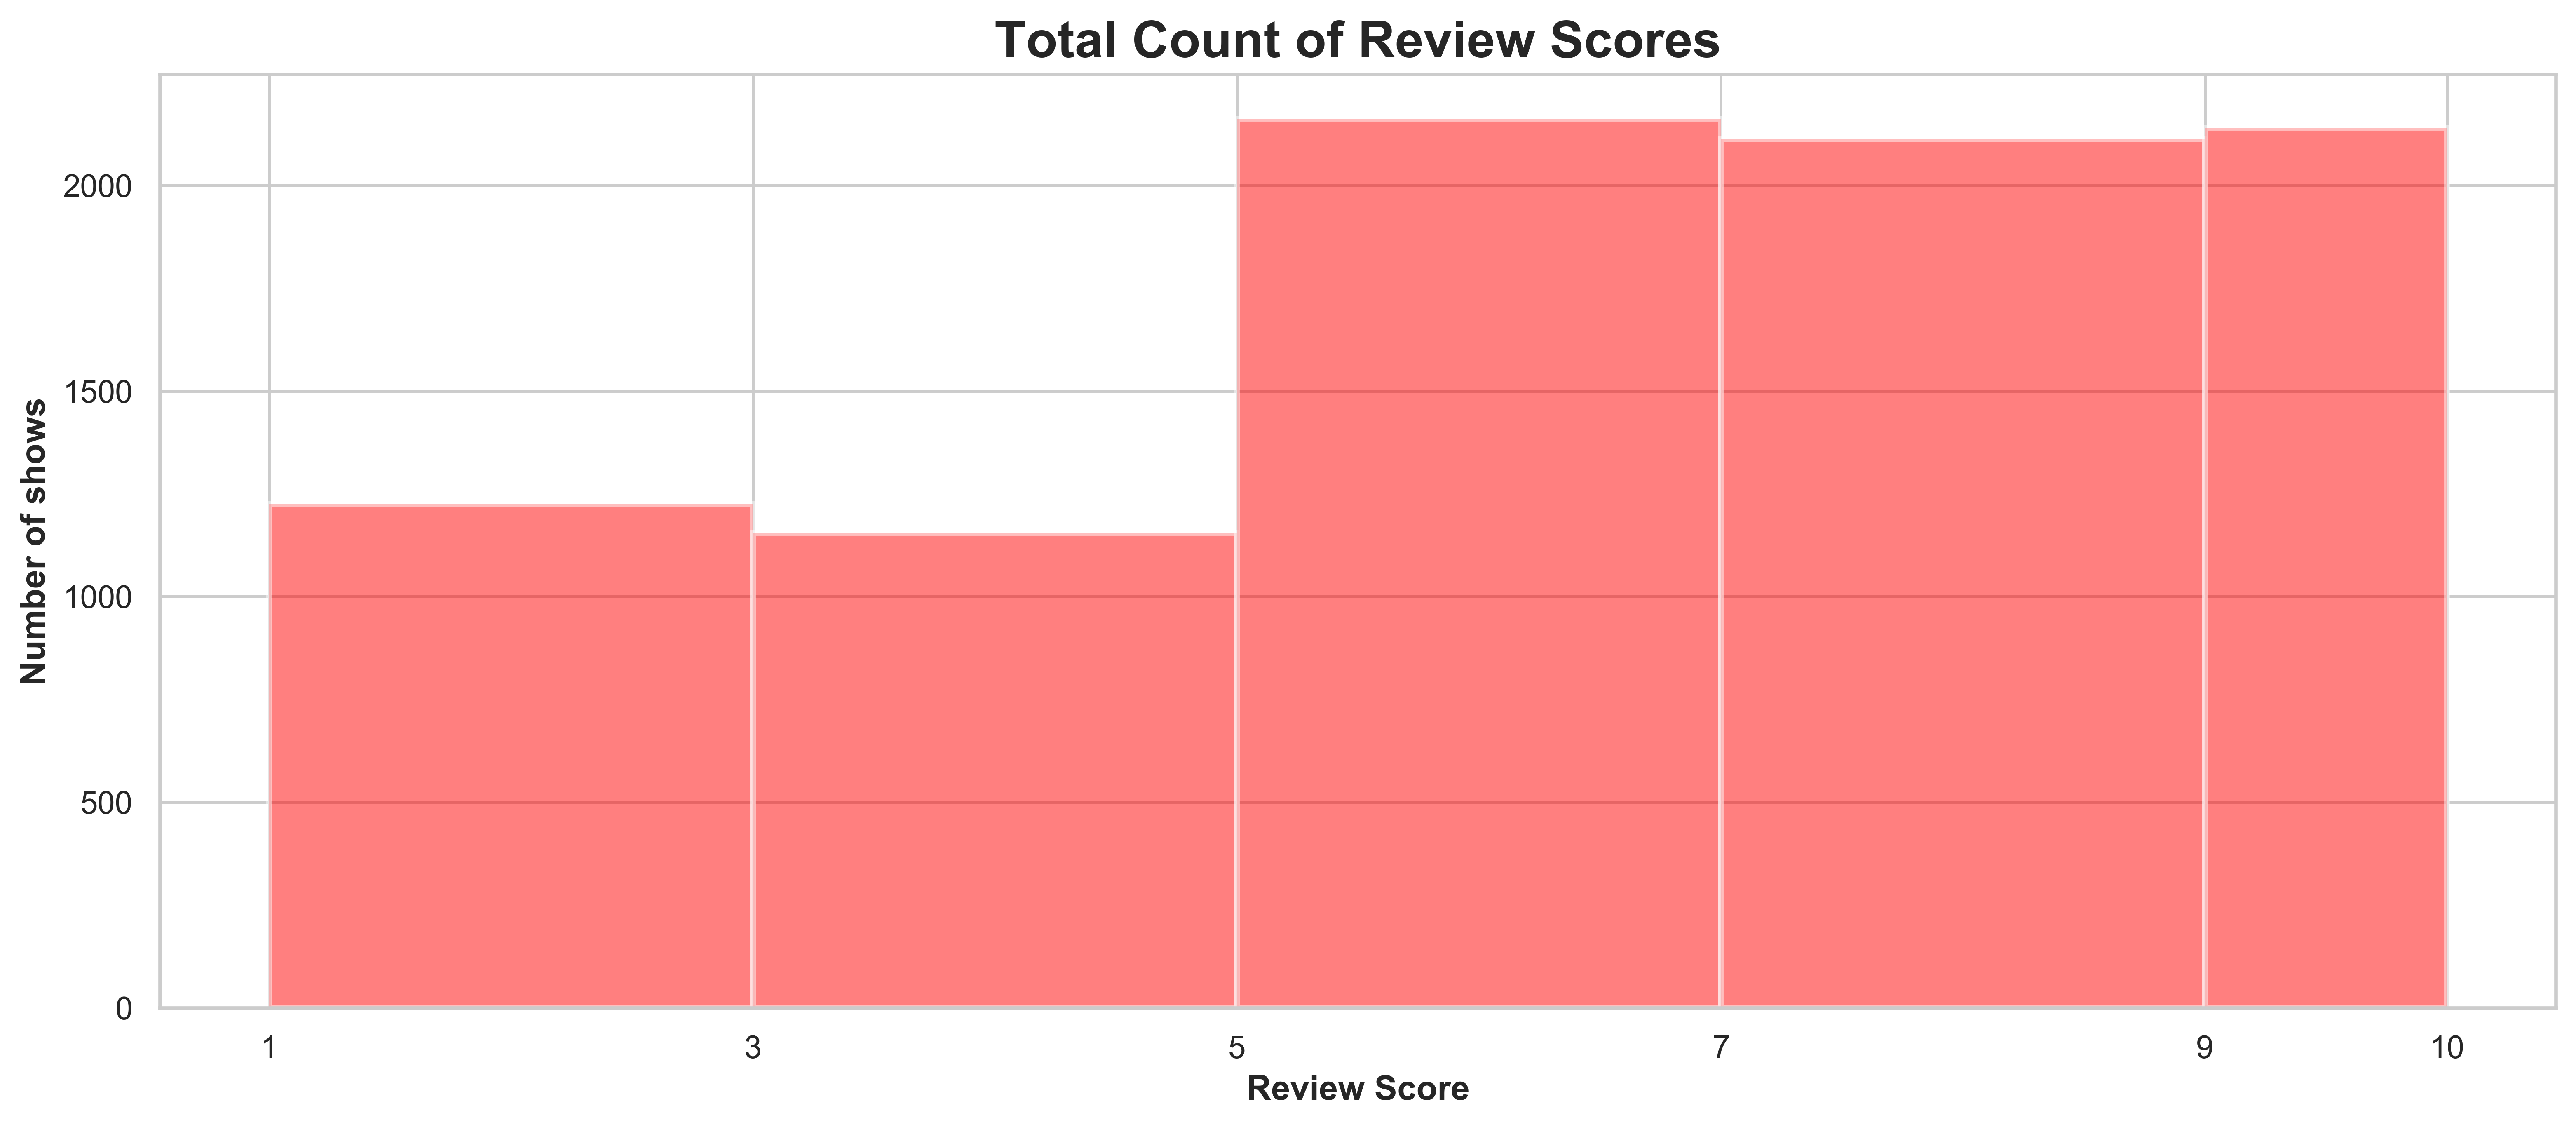

In [77]:
bin_edges = [1,3,5,7,9,10]

plt.hist(df2['review_score'],
        bins=bin_edges,
        density=False,
        histtype='bar',
        color='red',
        edgecolor='white',
        alpha=0.5,
        linewidth=2,
        linestyle='solid')

plt.xlabel('Review Score', fontsize = 12, fontweight = 'bold')
plt.xticks([1,3,5,7,9,10])
plt.ylabel('Number of shows', fontsize = 12, fontweight = 'bold')
plt.title('Total Count of Review Scores', fontsize = 18, fontweight = 'bold')
plt.style.use('fivethirtyeight')


plt.show()

In [78]:
#Verdict: There is a huge majority of high review scores as compared to low review scores of below 5.
          #Thus, there might not be much correlation between the rewview scores and the number of subscribers given that the 
          #number of subscribers are decreasing despite the high ratings. 
        
#Recommendation: SUSS+ should gather data on the number of viewers for each show for more accurate data analysis. 
                 #A show can have very few viewers and yet have high ratings and thus, does not display the 
                 #true performance ability of the show.